# 전처리

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_feather('/Data/lending_club')

In [ ]:
# df의 모든 컬럼 다 추출하는 코드
pd.set_option('display.max_columns', None)

In [ ]:
df['loan_status_N'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

In [ ]:
df[['loan_status','loan_status_N']].value_counts()

,,count
loan_status,loan_status_N,
Fully Paid,0,1373183
Charged Off,1,330463
Late (31-120 days),1,13393
Late (16-30 days),1,2222
Default,1,376


In [ ]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0 if x == 0 else 1)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0 else 1)
df['delinq_2yrs'] = df['delinq_2yrs'].apply(lambda x: 0 if x == 0 else 1)
df['num_accts_ever_120_pd'] = df['num_accts_ever_120_pd'].apply(lambda x: 0 if x == 0 else (-1 if x == -1 else 1))

In [ ]:
df = df[df['annual_inc'] < 10000000]

In [ ]:
df['term'] = df['term']/12

In [ ]:
df['pct_tl_nvr_dlq'] = df['pct_tl_nvr_dlq'].apply(lambda x: 100 - x if x >= 0 else x)

In [ ]:
df.loc[df['revol_util'] > 1, 'revol_util'] = 1.01

<ipython-input-11-99ff7f570a27>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.01' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df.loc[df['revol_util'] > 1, 'revol_util'] = 1.01


# 결측값 -1 과 inf 값 확인

In [ ]:
# df의 모든 컬럼 다 추출하는 코드
pd.set_option('display.max_columns', None)

In [ ]:
df = merged_df[[
'loan_amnt',
'funded_amnt',
'term',
'int_rate',
'installment',
'purpose',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'dti',
'delinq_2yrs',
'fico_range_high',
'open_acc',
'total_acc',
'revol_bal',
'revol_util',
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mort_acc',
'num_accts_ever_120_pd',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'total_rev_hi_lim',
'pub_rec',
'pub_rec_bankruptcies',
'tax_liens',
'collections_12_mths_ex_med',
'chargeoff_within_12_mths'
]]

In [ ]:
# 숫자형 열만 선택
numeric_cols = df.select_dtypes(include=[np.number])

# inf 값이 있는 열 찾기
columns_with_inf = numeric_cols.columns[np.isinf(numeric_cols).any()]
columns_with_inf

Index([], dtype='object')

In [ ]:
for col in df.columns :
    if len(df[df[col] == -1]) != 0 :
        print(col,':',len(df[df[col] == -1]))

bc_open_to_buy : 60383
bc_util : 60929
mo_sin_old_il_acct : 112486
mort_acc : 46180
num_accts_ever_120_pd : 65163
num_bc_sats : 54204
num_bc_tl : 65163
num_il_tl : 65163
num_op_rev_tl : 65163
num_rev_accts : 65164
num_rev_tl_bal_gt_0 : 65163
num_sats : 54204
num_tl_90g_dpd_24m : 65163
num_tl_op_past_12m : 65163
pct_tl_nvr_dlq : 65305
percent_bc_gt_75 : 60759
tot_hi_cred_lim : 65163
total_bal_ex_mort : 46180
total_bc_limit : 46180
total_il_high_credit_limit : 65163
total_rev_hi_lim : 65163
pub_rec_bankruptcies : 669
tax_liens : 38
collections_12_mths_ex_med : 55
chargeoff_within_12_mths : 55


In [ ]:
rows_with_neg_one = pd.DataFrame()

for col in df.columns:
    if len(df[df[col] == -1]) != 0:
        rows_with_neg_one = pd.concat([rows_with_neg_one, df[df[col] == -1]])

# 중복 제거
rows_with_neg_one = rows_with_neg_one.drop_duplicates()

rows_with_neg_one

,loan_amnt,funded_amnt,term,int_rate,installment,purpose,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,fico_range_high,open_acc,total_acc,revol_bal,revol_util,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,pub_rec,pub_rec_bankruptcies,tax_liens,collections_12_mths_ex_med,chargeoff_within_12_mths
0,5000,5000,36,0.1065,162.869995,credit_card,10+ years,RENT,24000.000000,Verified,27.650000,0.0,739,3.0,9.0,13648.0,0.837,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0
1,2500,2500,60,0.1527,59.830002,car,< 1 year,RENT,30000.000000,Source Verified,1.000000,0.0,744,3.0,4.0,1687.0,0.094,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0
2,2400,2400,36,0.1596,84.330002,small_business,10+ years,RENT,12252.000000,Not Verified,8.720000,0.0,739,2.0,10.0,2956.0,0.985,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0
3,10000,10000,36,0.1349,339.309998,other,10+ years,RENT,49200.000000,Source Verified,20.000000,0.0,694,10.0,37.0,5598.0,0.210,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0
4,3000,3000,60,0.1269,67.790001,other,1 year,RENT,80000.000000,Source Verified,17.940001,0.0,699,15.0,38.0,27783.0,0.539,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314750,16850,16850,60,0.2399,484.649994,debt_consolidation,Unemployed,MORTGAGE,57115.199219,Verified,27.969999,0.0,684,8.0,21.0,16211.0,0.850,0.0,0.0,132.0,41.0,1.0,0.0,0.0,0.0,14.0,5.0,6.0,6.0,8.0,0.0,2.0,81.0,-1.0,336557.0,52585.0,0.0,37507.0,19050.0,0,0,0,0,0
1333653,14600,14600,60,0.3049,476.769989,debt_consolidation,10+ years,OWN,42000.000000,Verified,25.770000,0.0,714,5.0,13.0,4869.0,0.760,0.0,0.0,151.0,193.0,0.0,0.0,2.0,2.0,7.0,2.0,6.0,2.0,5.0,0.0,0.0,100.0,-1.0,43097.0,31749.0,0.0,36697.0,6400.0,0,0,0,0,0
1414467,10000,10000,36,0.1262,335.119995,major_purchase,10+ years,MORTGAGE,139880.000000,Not Verified,18.500000,0.0,739,13.0,22.0,14420.0,0.730,0.0,0.0,220.0,140.0,1.0,0.0,0.0,0.0,15.0,4.0,6.0,3.0,12.0,0.0,2.0,100.0,-1.0,692876.0,102176.0,0.0,98772.0,19700.0,0,0,0,0,0
1427909,20000,20000,60,0.1274,452.410004,debt_consolidation,10+ years,MORTGAGE,58000.000000,Source Verified,1.940000,0.0,664,5.0,25.0,1816.0,0.290,0.0,0.0,129.0,247.0,2.0,0.0,2.0,2.0,5.0,4.0,18.0,3.0,5.0,0.0,2.0,92.0,-1.0,243148.0,1816.0,0.0,0.0,6300.0,0,0,0,0,0


In [ ]:
neg_one = rows_with_neg_one[[
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mort_acc',
'num_accts_ever_120_pd',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'total_rev_hi_lim',
]]

In [ ]:
len(neg_one.columns)

21

In [ ]:
# 모든 값이 동일한 행을 찾기
same_value_rows = neg_one[neg_one.nunique(axis=1) == 1]

# 그 값과 행의 개수를 계산
if not same_value_rows.empty:
    value_counts = same_value_rows.apply(lambda row: row.iloc[0], axis=1).value_counts()

    # 결과 출력
    for value, count in value_counts.items():
        print(f"모든 값이 {value}인 행이 {count}개 있습니다.")
else:
    print("모든 값이 동일한 행이 없습니다.")

모든 값이 -1.0인 행이 46180개 있습니다.


In [ ]:
# 21개 동일 컬럼에 46180의 결측치 존재 -> 대치 불가로 삭제 필요
columns = [
    'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mort_acc',
    'num_accts_ever_120_pd', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
    'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
    'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
    'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim'
]

# 모든 값이 -1인 행 찾기
rows_to_drop = merged_df[columns].eq(-1).all(axis=1)

merged_df = merged_df[~rows_to_drop]

merged_df

,id,delinq_2yrs,open_acc,total_acc,revol_bal,inq_fi,total_cu_tl,bc_open_to_buy,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,revol_util,all_util,bc_util,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,annual_inc_joint,application_type,avg_cur_bal,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,deferral_term,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,il_util,initial_list_status,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,loan_status_N,max_bal_bc,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_actv_bc_tl,num_actv_rev_tl,num_tl_120dpd_2m,num_tl_30dpd,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,state,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,total_bal_il,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,verification_status_joint,zip_code
38790,10129454.0,0.0,15.0,18.0,7137.0,-1.0,-1.0,15216.0,-1.0,48.0,0.0,0.0,8.0,10.0,0.0,15.0,18.0,7.0,15.0,0.0,4.0,29700.0,7137.0,18100.0,0.0,29700.0,0.240,-1.0,15.900000,0,8,NC,60000.0,5692.509766,Individual,476,0,0.000000,0,N,-1,0,4.620000,-1.0,2009-12-01,4 years,Project Manager,724,720,12000,12000.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,RENT,-1,f,-1,1,392.809998,0.1099,2013-12-01,2018-08-01,569,565,3775.550049,2016-04-01,12000,Fully Paid,1,-1,1,1,-1,-1,-1,-1,1,-1,3,-1,NaT,4,7,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,debt_consolidation,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,NC,B2,0,36,No Regrets,0,7137,-1,13988.610352,13988.610352,1988.609985,0.000000,12000.000000,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,281
38791,10149488.0,0.0,3.0,8.0,4136.0,-1.0,-1.0,21564.0,104.0,220.0,0.0,0.0,3.0,4.0,1.0,3.0,7.0,2.0,3.0,0.0,0.0,25700.0,4136.0,25700.0,0.0,25700.0,0.161,-1.0,16.100000,0,0,TX,39600.0,5692.509766,Individual,1379,0,0.000000,0,N,-1,0,2.490000,-1.0,1995-08-01,2 years,Surgical Technician,759,755,4800,4800.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,MORTGAGE,-1,w,-1,2,157.130005,0.1099,2013-12-01,2017-01-01,534,530,3900.479980,2014-09-01,4800,Fully Paid,1,-1,25,25,-1,-1,-1,-1,25,-1,3,-1,NaT,2,2,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,home_improvement,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,TX,B2,0,36,For The House,0,4136,-1,5157.519531,5157.520020,357.519989,0.000000,4800.000000,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,782
38792,10149342.0,0.0,14.0,27.0,36638.0,-1.0,-1.0,16473.0,117.0,326.0,4.0,0.0,4.0,8.0,8.0,10.0,15.0,4.0,14.0,0.0,1.0,138554.0,70186.0,35700.0,33054.0,5990

In [ ]:
1458843 - 46180

1412663

In [ ]:
neg_one = merged_df[[
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mort_acc',
'num_accts_ever_120_pd',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'total_rev_hi_lim',
'pub_rec_bankruptcies',
'tax_liens',
'collections_12_mths_ex_med',
'chargeoff_within_12_mths'
]]

In [ ]:
for col in neg_one.columns :
    if len(neg_one[neg_one[col] == -1]) != 0 :
        print(col,':',len(neg_one[neg_one[col] == -1]))

bc_open_to_buy : 14203
bc_util : 14749
mo_sin_old_il_acct : 66306
num_accts_ever_120_pd : 18983
num_bc_sats : 8024
num_bc_tl : 18983
num_il_tl : 18983
num_op_rev_tl : 18983
num_rev_accts : 18984
num_rev_tl_bal_gt_0 : 18983
num_sats : 8024
num_tl_90g_dpd_24m : 18983
num_tl_op_past_12m : 18983
pct_tl_nvr_dlq : 19125
percent_bc_gt_75 : 14579
tot_hi_cred_lim : 18983
total_il_high_credit_limit : 18983
total_rev_hi_lim : 18983


In [ ]:
neg_one = merged_df[[
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'num_accts_ever_120_pd',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_il_high_credit_limit',
'total_rev_hi_lim'
]]

In [ ]:
len(neg_one.columns)

18

In [ ]:
# 모든 값이 동일한 행을 찾기
same_value_rows = neg_one[neg_one.nunique(axis=1) == 1]

# 그 값과 행의 개수를 계산
if not same_value_rows.empty:
    value_counts = same_value_rows.apply(lambda row: row.iloc[0], axis=1).value_counts()

    # 결과 출력
    for value, count in value_counts.items():
        print(f"모든 값이 {value}인 행이 {count}개 있습니다.")
else:
    print("모든 값이 동일한 행이 없습니다.")

모든 값이 -1.0인 행이 99개 있습니다.


In [ ]:
# 18개 동일 컬럼에 99의 결측치 존재 -> 대치 불가로 삭제 필요
columns = [
    'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
    'num_accts_ever_120_pd', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
    'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
    'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_il_high_credit_limit', 'total_rev_hi_lim'
]

# 모든 값이 -1인 행 찾기
rows_to_drop = merged_df[columns].eq(-1).all(axis=1)

merged_df = merged_df[~rows_to_drop]

merged_df

,id,delinq_2yrs,open_acc,total_acc,revol_bal,inq_fi,total_cu_tl,bc_open_to_buy,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,revol_util,all_util,bc_util,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,annual_inc_joint,application_type,avg_cur_bal,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,deferral_term,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,il_util,initial_list_status,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,loan_status_N,max_bal_bc,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_actv_bc_tl,num_actv_rev_tl,num_tl_120dpd_2m,num_tl_30dpd,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,state,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,total_bal_il,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,verification_status_joint,zip_code
38790,10129454.0,0.0,15.0,18.0,7137.0,-1.0,-1.0,15216.0,-1.0,48.0,0.0,0.0,8.0,10.0,0.0,15.0,18.0,7.0,15.0,0.0,4.0,29700.0,7137.0,18100.0,0.0,29700.0,0.240,-1.0,15.900000,0,8,NC,60000.0,5692.509766,Individual,476,0,0.000000,0,N,-1,0,4.620000,-1.0,2009-12-01,4 years,Project Manager,724,720,12000,12000.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,RENT,-1,f,-1,1,392.809998,0.1099,2013-12-01,2018-08-01,569,565,3775.550049,2016-04-01,12000,Fully Paid,1,-1,1,1,-1,-1,-1,-1,1,-1,3,-1,NaT,4,7,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,debt_consolidation,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,NC,B2,0,36,No Regrets,0,7137,-1,13988.610352,13988.610352,1988.609985,0.000000,12000.000000,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,281
38791,10149488.0,0.0,3.0,8.0,4136.0,-1.0,-1.0,21564.0,104.0,220.0,0.0,0.0,3.0,4.0,1.0,3.0,7.0,2.0,3.0,0.0,0.0,25700.0,4136.0,25700.0,0.0,25700.0,0.161,-1.0,16.100000,0,0,TX,39600.0,5692.509766,Individual,1379,0,0.000000,0,N,-1,0,2.490000,-1.0,1995-08-01,2 years,Surgical Technician,759,755,4800,4800.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,MORTGAGE,-1,w,-1,2,157.130005,0.1099,2013-12-01,2017-01-01,534,530,3900.479980,2014-09-01,4800,Fully Paid,1,-1,25,25,-1,-1,-1,-1,25,-1,3,-1,NaT,2,2,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,home_improvement,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,TX,B2,0,36,For The House,0,4136,-1,5157.519531,5157.520020,357.519989,0.000000,4800.000000,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,782
38792,10149342.0,0.0,14.0,27.0,36638.0,-1.0,-1.0,16473.0,117.0,326.0,4.0,0.0,4.0,8.0,8.0,10.0,15.0,4.0,14.0,0.0,1.0,138554.0,70186.0,35700.0,33054.0,5990

In [ ]:
1412663 - 99

1412564

In [ ]:
neg_one = merged_df[[
'bc_open_to_buy',
'bc_util',
'all_util',
'mo_sin_old_il_acct',
'num_accts_ever_120_pd',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_il_high_credit_limit',
'total_rev_hi_lim'
]]

In [ ]:
for col in neg_one.columns :
    if len(neg_one[neg_one[col] == -1]) != 0 :
        print(col,':',len(neg_one[neg_one[col] == -1]))

bc_open_to_buy : 14104
bc_util : 14650
mo_sin_old_il_acct : 66207
num_accts_ever_120_pd : 18884
num_bc_sats : 7925
num_bc_tl : 18884
num_il_tl : 18884
num_op_rev_tl : 18884
num_rev_accts : 18885
num_rev_tl_bal_gt_0 : 18884
num_sats : 7925
num_tl_90g_dpd_24m : 18884
num_tl_op_past_12m : 18884
pct_tl_nvr_dlq : 19026
percent_bc_gt_75 : 14480
tot_hi_cred_lim : 18884
total_il_high_credit_limit : 18884
total_rev_hi_lim : 18884


In [ ]:
# 각 행에서 -1의 개수를 셉니다
neg_one_counts = (merged_df[neg_one.columns] == -1).sum(axis=1)

# 각 -1 개수에 해당하는 행의 수를 셉니다
summary = neg_one_counts.value_counts().sort_index()

# 결과 출력
for num_neg_ones, count in summary.items():
    print(f"{num_neg_ones}개의 컬럼이 -1인 행이 {count}개 있습니다.")

0개의 컬럼이 -1인 행이 1331637개 있습니다.
1개의 컬럼이 -1인 행이 48053개 있습니다.
2개의 컬럼이 -1인 행이 19개 있습니다.
3개의 컬럼이 -1인 행이 13683개 있습니다.
4개의 컬럼이 -1인 행이 288개 있습니다.
13개의 컬럼이 -1인 행이 10820개 있습니다.
14개의 컬럼이 -1인 행이 6개 있습니다.
15개의 컬럼이 -1인 행이 7922개 있습니다.
16개의 컬럼이 -1인 행이 136개 있습니다.


In [ ]:
# 각 행에서 -1의 개수를 셉니다
neg_one_counts = (merged_df[neg_one.columns] == -1).sum(axis=1)

# 13개 이상 -1인 행들을 필터링하여 삭제
merged_df = merged_df[neg_one_counts < 13]

In [ ]:
merged_df

,id,delinq_2yrs,open_acc,total_acc,revol_bal,inq_fi,total_cu_tl,bc_open_to_buy,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,revol_util,all_util,bc_util,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,annual_inc_joint,application_type,avg_cur_bal,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,deferral_term,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,il_util,initial_list_status,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,loan_status_N,max_bal_bc,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_actv_bc_tl,num_actv_rev_tl,num_tl_120dpd_2m,num_tl_30dpd,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,state,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,total_bal_il,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,verification_status_joint,zip_code
38790,10129454.0,0.0,15.0,18.0,7137.0,-1.0,-1.0,15216.0,-1.0,48.0,0.0,0.0,8.0,10.0,0.0,15.0,18.0,7.0,15.0,0.0,4.0,29700.0,7137.0,18100.0,0.0,29700.0,0.240,-1.0,15.900000,0,8,NC,60000.0,5692.509766,Individual,476,0,0.000000,0,N,-1,0,4.620000,-1.0,2009-12-01,4 years,Project Manager,724,720,12000,12000.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,RENT,-1,f,-1,1,392.809998,0.1099,2013-12-01,2018-08-01,569,565,3775.550049,2016-04-01,12000,Fully Paid,1,-1,1,1,-1,-1,-1,-1,1,-1,3,-1,NaT,4,7,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,debt_consolidation,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,NC,B2,0,36,No Regrets,0,7137,-1,13988.610352,13988.610352,1988.609985,0.000000,12000.000000,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,281
38791,10149488.0,0.0,3.0,8.0,4136.0,-1.0,-1.0,21564.0,104.0,220.0,0.0,0.0,3.0,4.0,1.0,3.0,7.0,2.0,3.0,0.0,0.0,25700.0,4136.0,25700.0,0.0,25700.0,0.161,-1.0,16.100000,0,0,TX,39600.0,5692.509766,Individual,1379,0,0.000000,0,N,-1,0,2.490000,-1.0,1995-08-01,2 years,Surgical Technician,759,755,4800,4800.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,MORTGAGE,-1,w,-1,2,157.130005,0.1099,2013-12-01,2017-01-01,534,530,3900.479980,2014-09-01,4800,Fully Paid,1,-1,25,25,-1,-1,-1,-1,25,-1,3,-1,NaT,2,2,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,home_improvement,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,TX,B2,0,36,For The House,0,4136,-1,5157.519531,5157.520020,357.519989,0.000000,4800.000000,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,782
38792,10149342.0,0.0,14.0,27.0,36638.0,-1.0,-1.0,16473.0,117.0,326.0,4.0,0.0,4.0,8.0,8.0,10.0,15.0,4.0,14.0,0.0,1.0,138554.0,70186.0,35700.0,33054.0,5990

In [ ]:
1412564  - 10820 - 7922 - 6 - 136

1393680

In [ ]:
for col in neg_one.columns :
    if len(merged_df[merged_df[col] == -1]) != 0 :
        print(col,':',len(merged_df[merged_df[col] == -1]))

bc_open_to_buy : 13971
bc_util : 14508
all_util : 646267
mo_sin_old_il_acct : 47323
num_rev_accts : 1
pct_tl_nvr_dlq : 142
percent_bc_gt_75 : 14347


In [ ]:
### all_util 은 삭제 필요 ###

In [ ]:
merged_df.to_feather('/content/drive/MyDrive/SKC&C_STUDY/데이터 저장/이상치_결측치.feather')

# Box-Cox 변환 후, Min-Max 스케일링

In [ ]:
df.loc[df['all_util'] > 100, 'all_util'] = 101

In [ ]:
df.loc[df['bc_util'] > 100, 'bc_util'] = 101

In [ ]:
df['all_util'] = df['all_util'].apply(lambda x: x/100 if x >= 0 else x)

In [ ]:
df['bc_util'] = df['bc_util'].apply(lambda x: x/100 if x >= 0 else x)

In [ ]:
df.loc[df['new_revol_util'] > 1, 'new_revol_util'] = 1.01
df.loc[df['new_all_util'] > 100, 'new_all_util'] = 101
df.loc[df['new_bc_util'] > 100, 'new_bc_util'] = 101
df['new_all_util'] = df['new_all_util'].apply(lambda x: x/100 if x >= 0 else x)
df['new_bc_util'] = df['new_bc_util'].apply(lambda x: x/100 if x >= 0 else x)

In [ ]:
df['dti'] = df['dti'].apply(lambda x : 41 if x > 40 else x)

In [ ]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'ver_1', 'ver_2', 'home_1', 'home_2', 'home_3', 'home_4', 'home_5',
       'fico_100', 'new_fico', 'mort'],
      dtype='object', length=163)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def min_max_scale_columns(df, columns):
    # 각 컬럼에 대해 Min-Max 스케일링을 적용
    for column in columns:
        df[column] = df[column].astype(float)
        # -1의 인덱스를 기억
        neg_one_indices = df[df[column] == -1].index

        # -1이 아닌 값들만 선택하여 Min-Max 스케일링 적용
        scaler = MinMaxScaler()
        df.loc[df[column] != -1, column] = scaler.fit_transform(df[df[column] != -1][[column]])

        # -1을 원래 위치에 다시 넣기
        df.loc[neg_one_indices, column] = -1

    return df

In [ ]:
# 특정 컬럼들에 대해 함수 적용
df = min_max_scale_columns(df, ['percent_bc_gt_75', 'fico_range_high','dti'])

In [ ]:
df[['percent_bc_gt_75','fico_range_high','dti']]

,percent_bc_gt_75,fico_range_high,dti
0,0.000,0.322581,0.112683
1,0.000,0.510753,0.060732
2,0.250,0.376344,0.557805
3,1.000,0.241935,0.307561
4,1.000,0.053763,0.244390
...,...,...,...
1719676,0.000,0.053763,0.284146
1719677,0.143,0.349462,0.476829
1719678,0.000,0.241935,0.501463
1719679,0.000,0.053763,0.487561


Text(0, 0.5, 'Frequency')

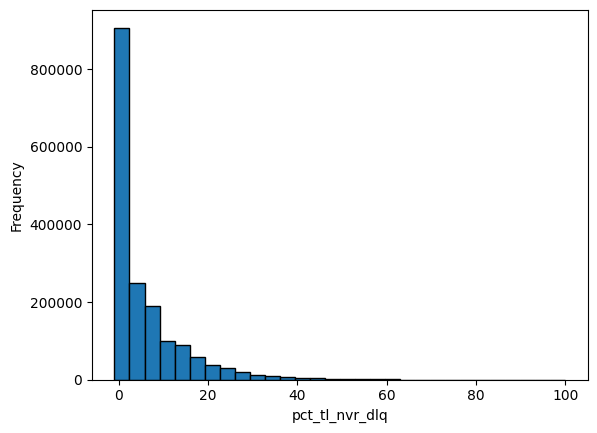

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['pct_tl_nvr_dlq'], bins=30, edgecolor='black')
plt.xlabel('pct_tl_nvr_dlq')
plt.ylabel('Frequency')

In [ ]:
### 박스 콕스 변환 (min-max 포함) - 개별 컬럼
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def boxcox_transform_and_plot(df, column):

    # -1을 결측치로 처리하고 제거, 인덱스 기억
    df_clean = df[[column]].copy().astype(float)

    # 원래의 인덱스 유지
    original_indices = df_clean.index

    # -1을 갖는 행들의 인덱스를 따로 저장
    neg_one_indices = df_clean[df_clean[column] == -1].index

    # -1 값 제거
    df_clean = df_clean[df_clean[column] != -1]

    # 모든 값을 양수로 만들기 위해 최소값을 1로 맞춤
    shifted_df = df_clean[column] - df_clean[column].min() + 1

    # Box-Cox 변환 적용
    transformed_data, lambda_val = stats.boxcox(shifted_df)

    # 변환된 데이터를 원래 인덱스를 유지하며 df_clean에 업데이트
    df_clean[column] = transformed_data

    # Min-Max 스케일링 적용
    scaler = MinMaxScaler()
    df_clean[column] = scaler.fit_transform(df_clean[[column]])

    # -1 값을 가진 인덱스 위치에 다시 -1을 설정
    df_clean = df_clean.reindex(original_indices)  # 원래 인덱스 복원
    df_clean.loc[neg_one_indices, column] = -1     # -1을 다시 할당


    # 원본 데이터 시각화
    plt.figure(figsize=(12, 6))

    # 원본 데이터 히스토그램
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Original {column} (with -1 and 0)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box-Cox 변환 후 데이터 시각화
    plt.subplot(1, 2, 2)
    plt.hist(df_clean[column], bins=30, edgecolor='black')
    plt.title(f'Box-Cox Transformed {column}\n(lambda={lambda_val:.4f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return lambda_val

In [ ]:
## 로그 변환  - 개별 컬럼
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def log_transform_and_plot(df, column):
    # -1을 결측치로 처리하고 제거, 인덱스 기억
    df_clean = df[[column]].copy()
    df_clean[column] = df_clean[column].astype(float)

    # 원래의 인덱스 유지
    original_indices = df_clean.index

    # -1을 가진 인덱스 기억
    neg_one_indices = df_clean[df_clean[column] == -1].index

    # -1을 제외한 데이터만으로 로그 변환 적용
    df_clean = df_clean[df_clean[column] != -1]

    # 로그 변환 (데이터에 1을 더해 로그 변환이 가능하도록 함)
    df_clean[column] = df_clean[column].apply(lambda x: np.log1p(x) if x > 0 else np.nan)

    # Min-Max 스케일링 적용
    scaler = MinMaxScaler()
    df_clean[column] = scaler.fit_transform(df_clean[[column]])

    # 원래의 인덱스 복원 및 -1 값을 원래 위치에 다시 할당
    df_clean = df_clean.reindex(original_indices)  # 원래 인덱스로 재인덱싱
    df_clean.loc[neg_one_indices, column] = -1     # -1을 다시 할당

    # 원본 데이터 시각화
    plt.figure(figsize=(12, 6))

    # 원본 데이터 히스토그램
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Original {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # 로그 변환 후 데이터 히스토그램
    plt.subplot(1, 2, 2)
    plt.hist(df_clean[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Log Transformed {column}')
    plt.xlabel(f'log({column} + 1)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def boxcox_transform_columns(df, columns):
    lambda_dict = {}

    for column in columns:
        # -1을 결측치로 처리하고 제거, 인덱스 기억
        df_clean = df[[column]].copy().astype(float)

        # 원래의 인덱스 유지
        original_indices = df_clean.index

        # -1을 갖는 행들의 인덱스를 따로 저장
        neg_one_indices = df_clean[df_clean[column] == -1].index

        # -1 값 제거
        df_clean = df_clean[df_clean[column] != -1]

        # 모든 값을 양수로 만들기 위해 최소값을 1로 맞춤
        shifted_df = df_clean[column] - df_clean[column].min() + 1

        # Box-Cox 변환 적용
        transformed_data, lambda_val = stats.boxcox(shifted_df)

        # 변환된 데이터를 원래 인덱스를 유지하며 df_clean에 업데이트
        df_clean[column] = transformed_data

        # Min-Max 스케일링 적용
        scaler = MinMaxScaler()
        df_clean[column] = scaler.fit_transform(df_clean[[column]])

        # -1 값을 가진 인덱스 위치에 다시 -1을 설정
        df_clean = df_clean.reindex(original_indices)  # 원래 인덱스 복원
        df_clean.loc[neg_one_indices, column] = -1     # -1을 다시 할당

        # 람다 값을 저장
        lambda_dict[column] = lambda_val

        # 원본 데이터 시각화
        plt.figure(figsize=(12, 6))

        # 원본 데이터 히스토그램
        plt.subplot(1, 2, 1)
        plt.hist(df[column], bins=30, edgecolor='black')
        plt.title(f'Original {column} (with -1 and 0)')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # 원본 데이터프레임에 결과 반영
        df[column] = df_clean[column]

        # Box-Cox 변환 후 데이터 시각화
        plt.subplot(1, 2, 2)
        plt.hist(df_clean[column], bins=30, edgecolor='black')
        plt.title(f'Box-Cox Transformed {column}\n(lambda={lambda_val:.4f})')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    return df, lambda_dict

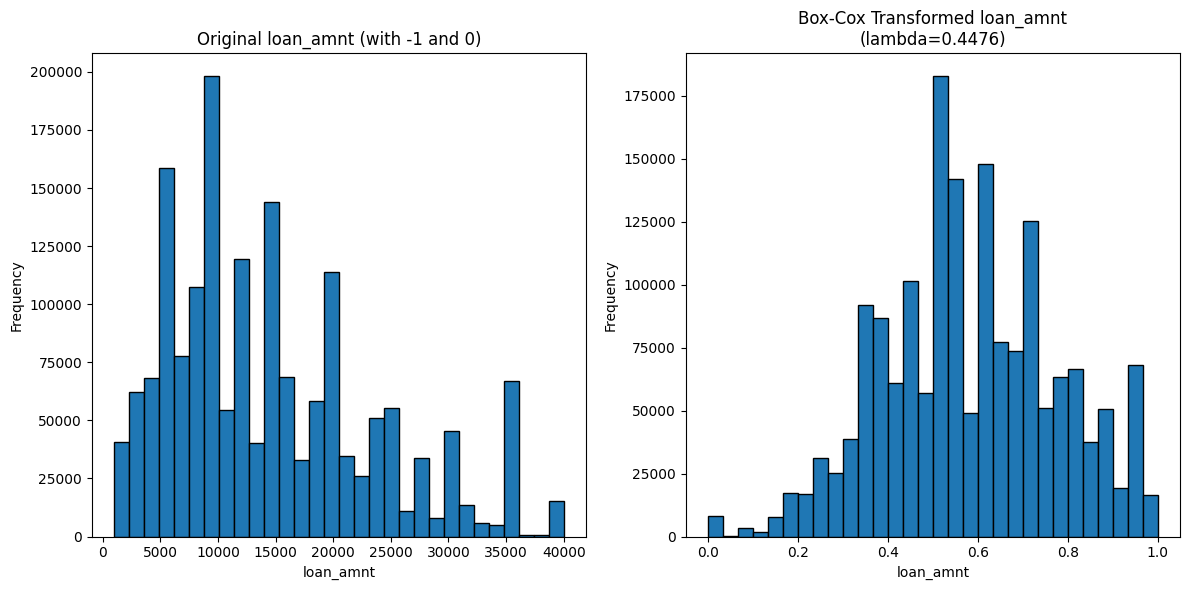

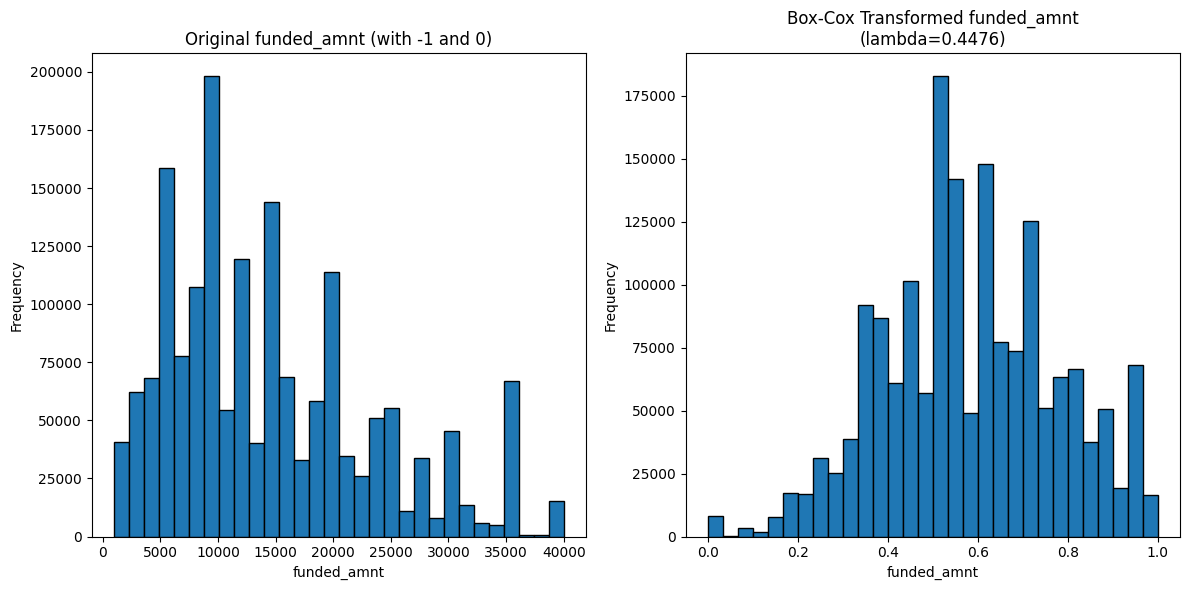

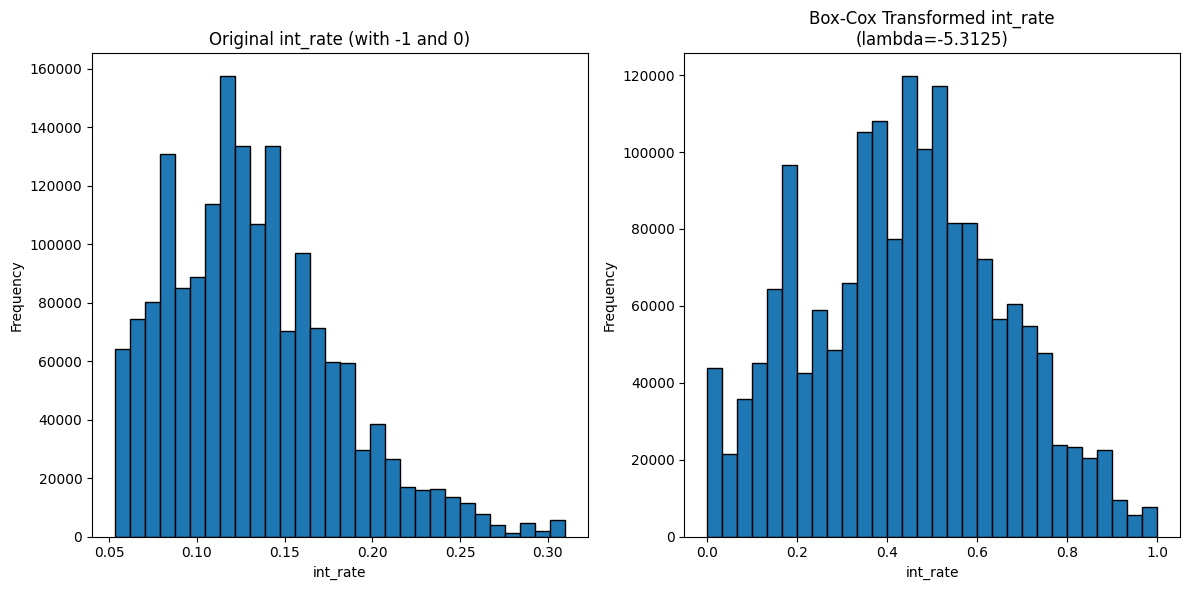

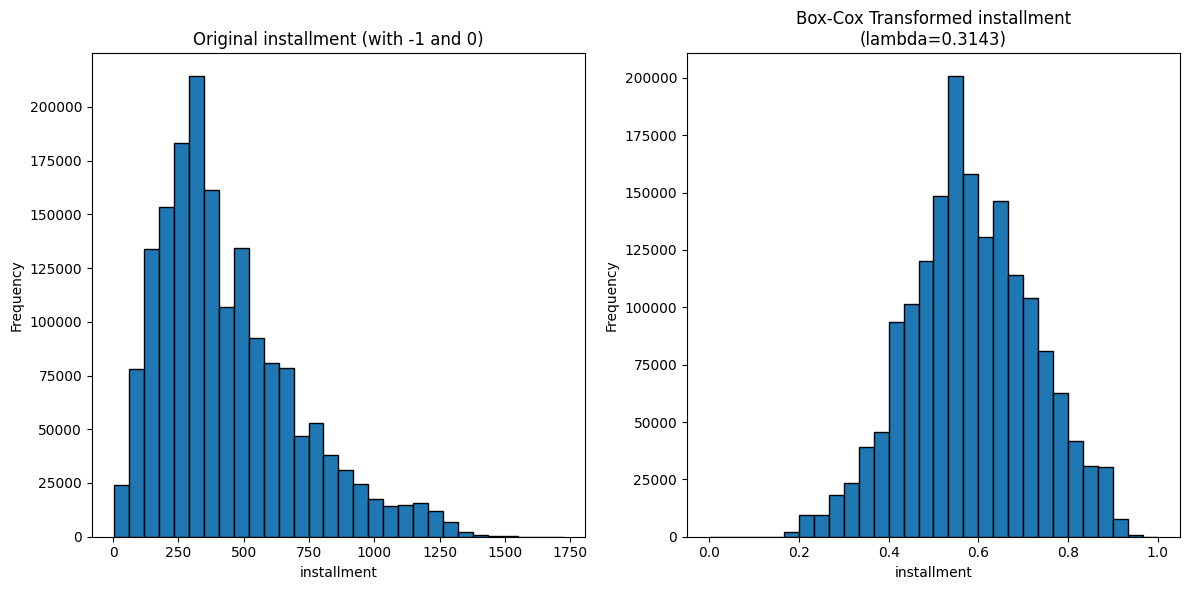

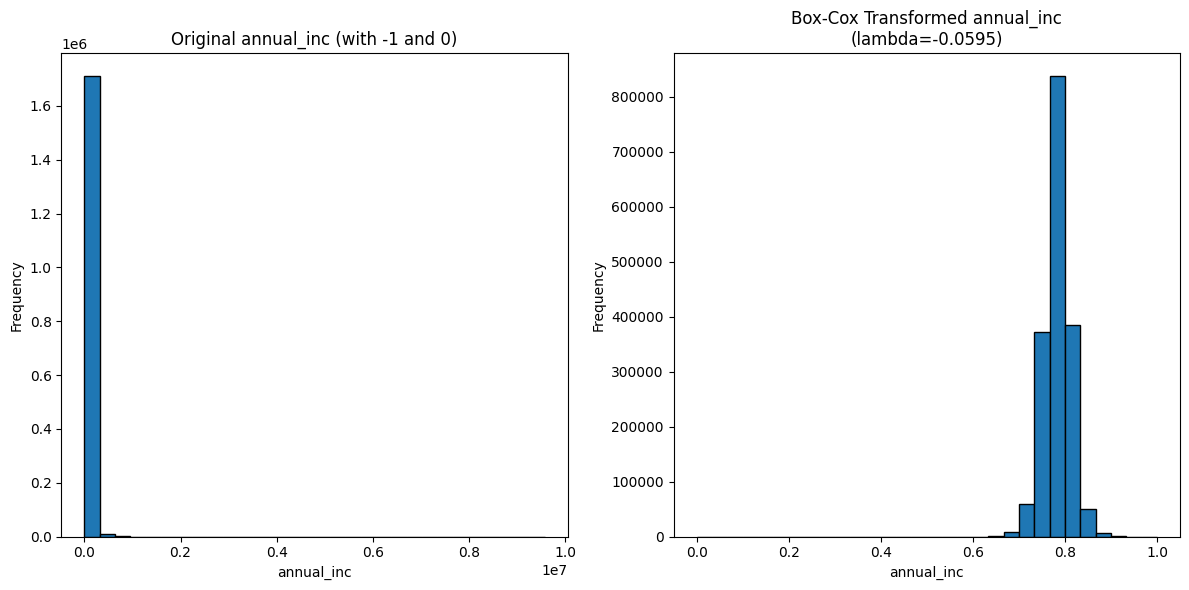

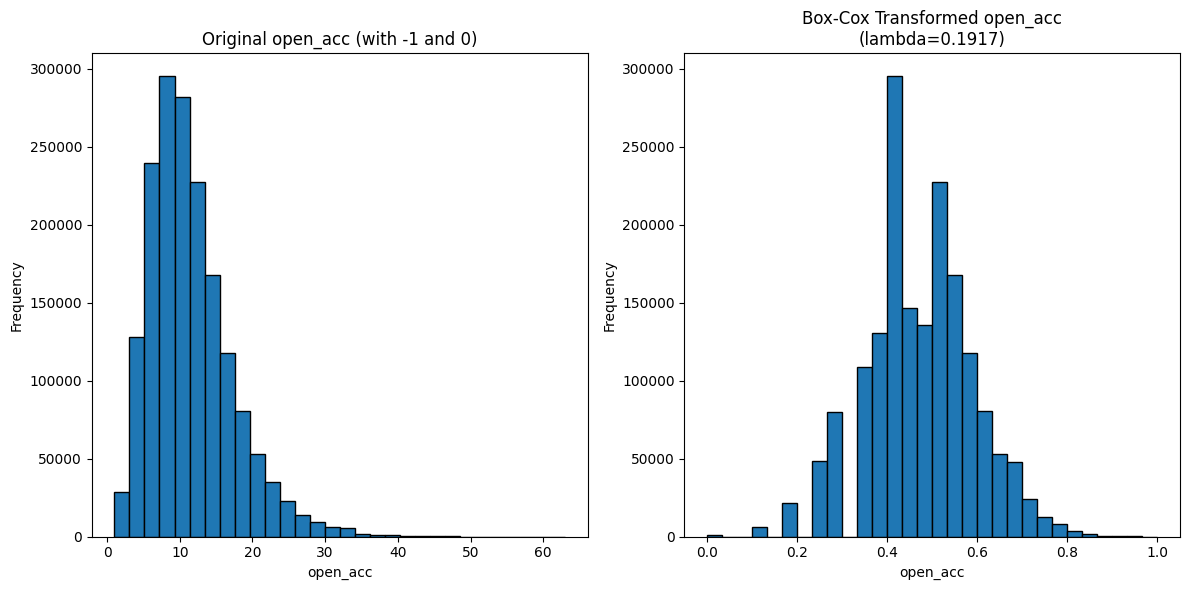

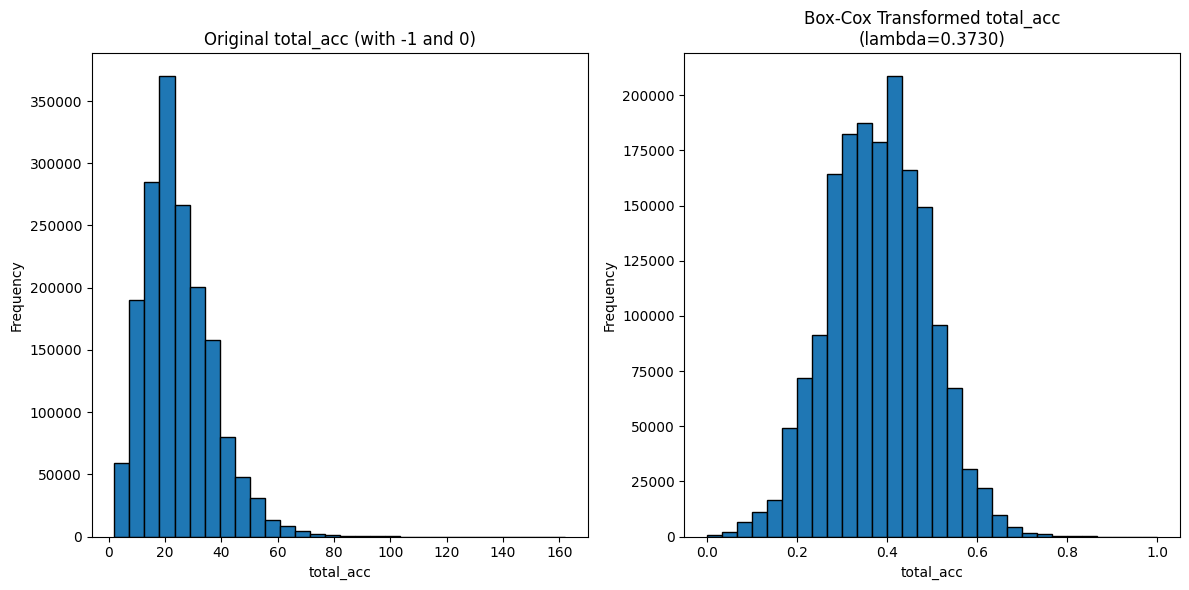

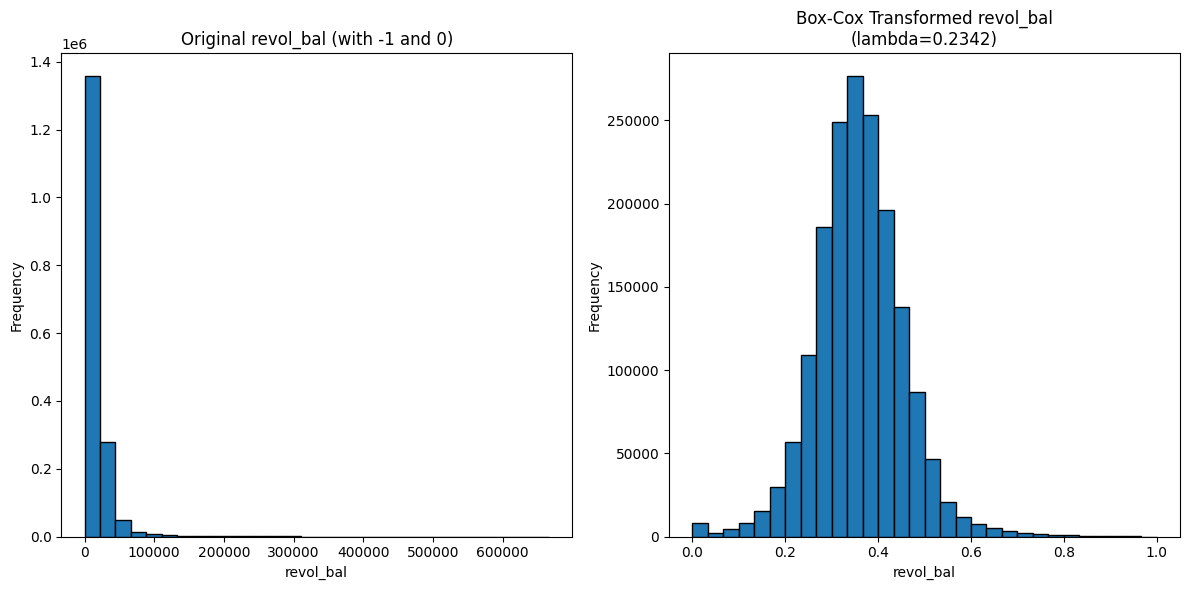

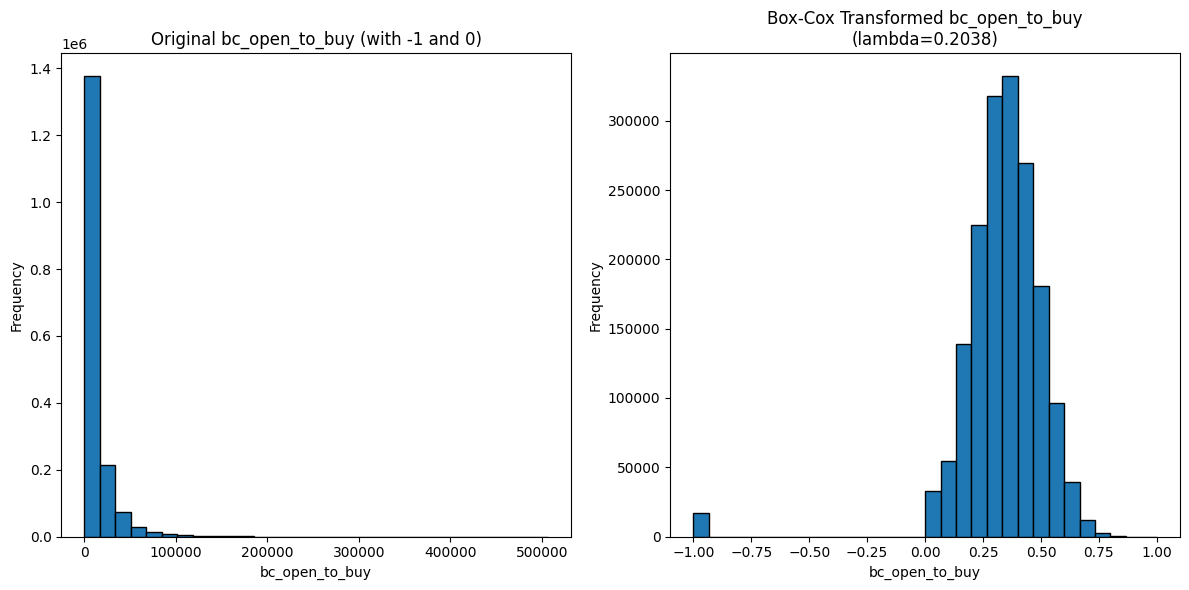

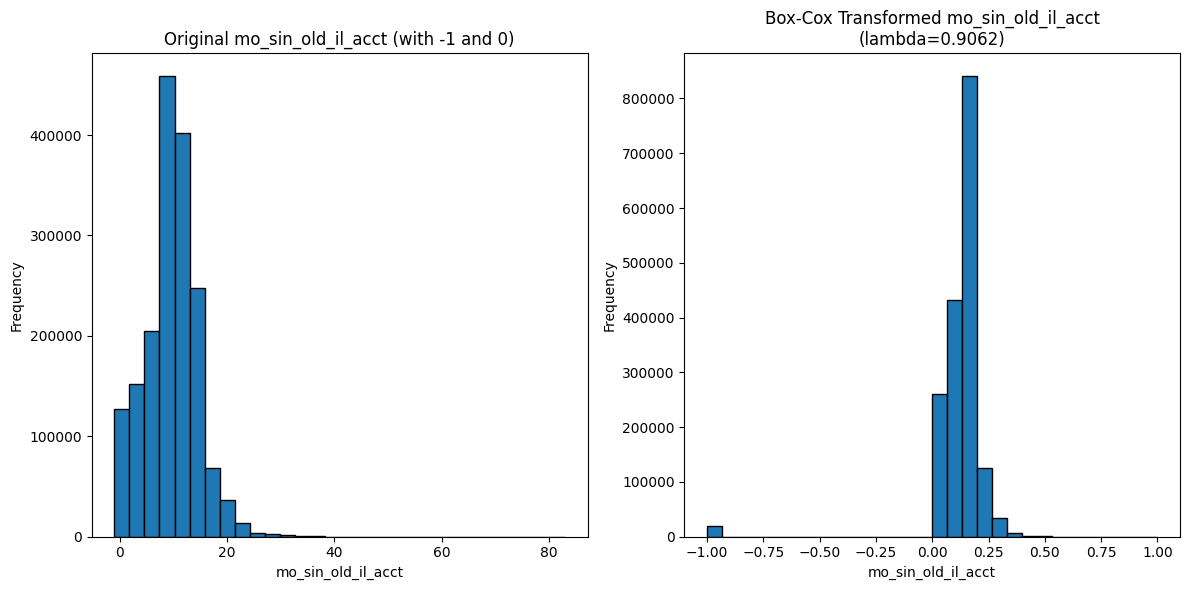

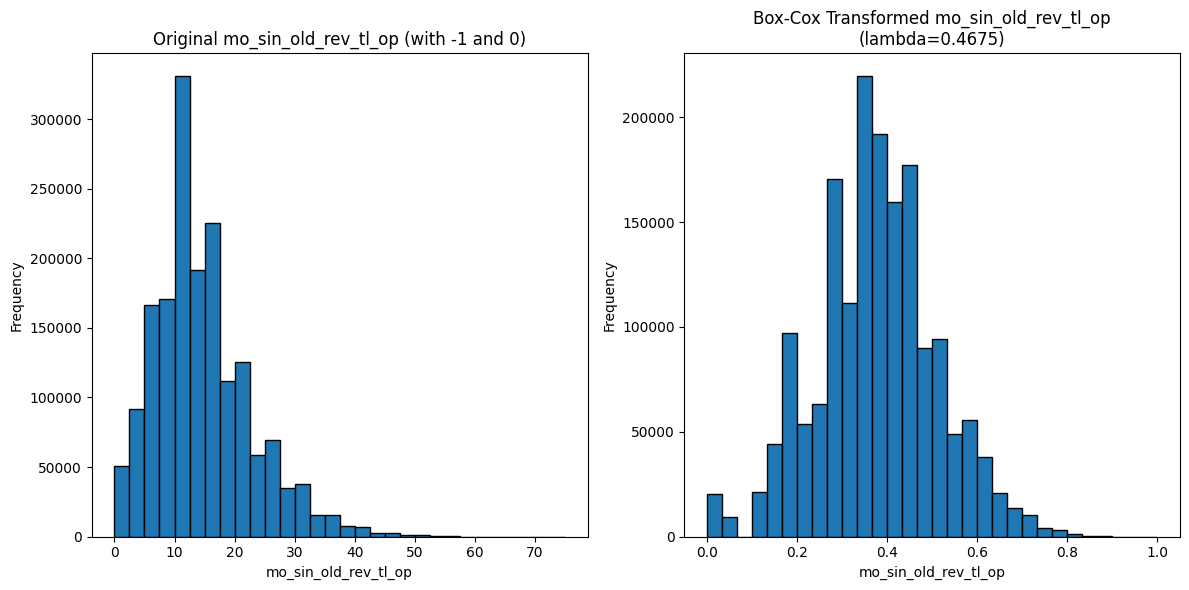

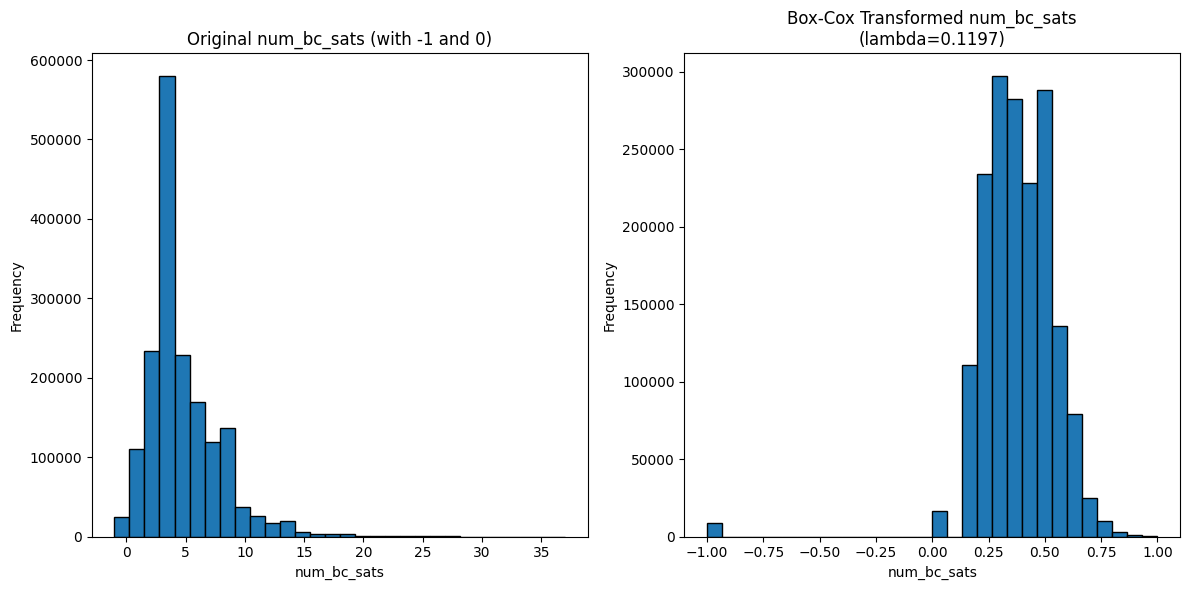

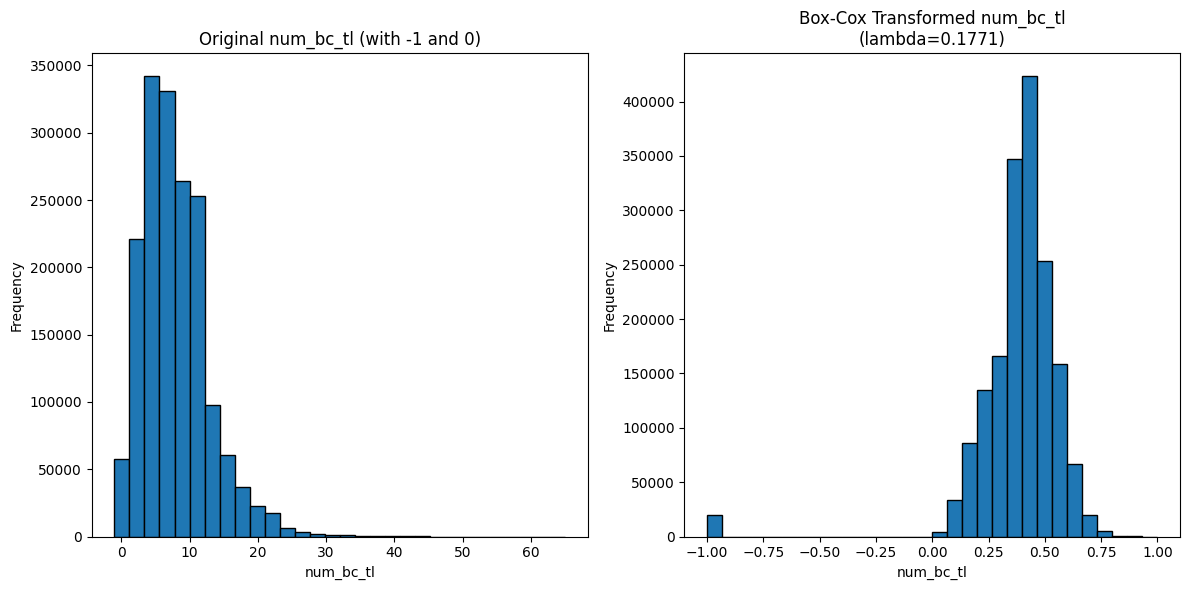

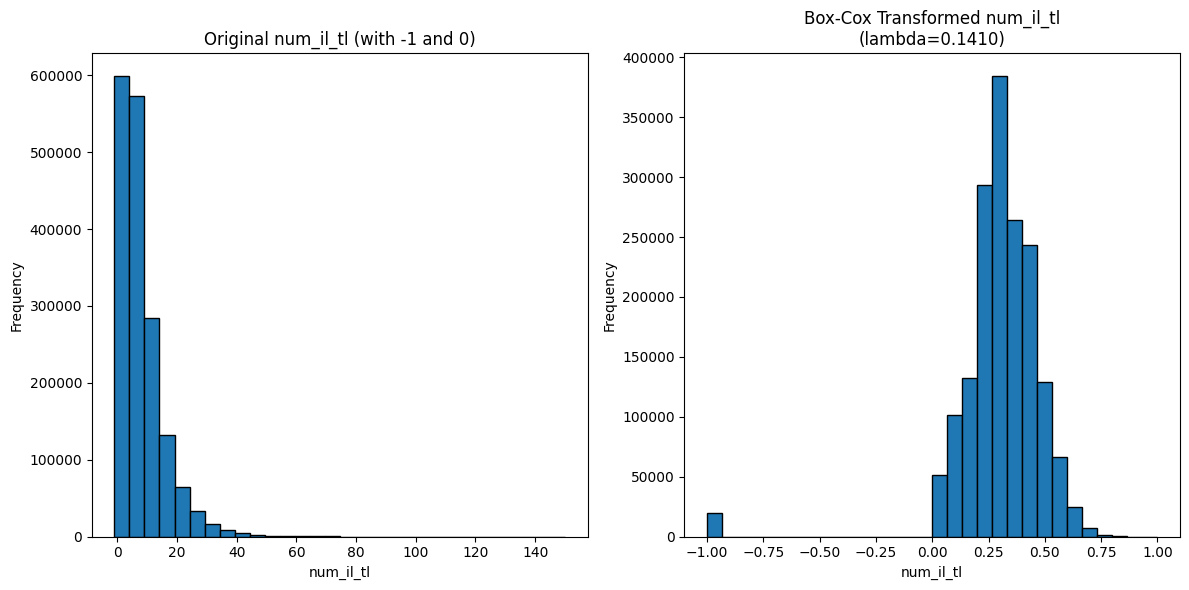

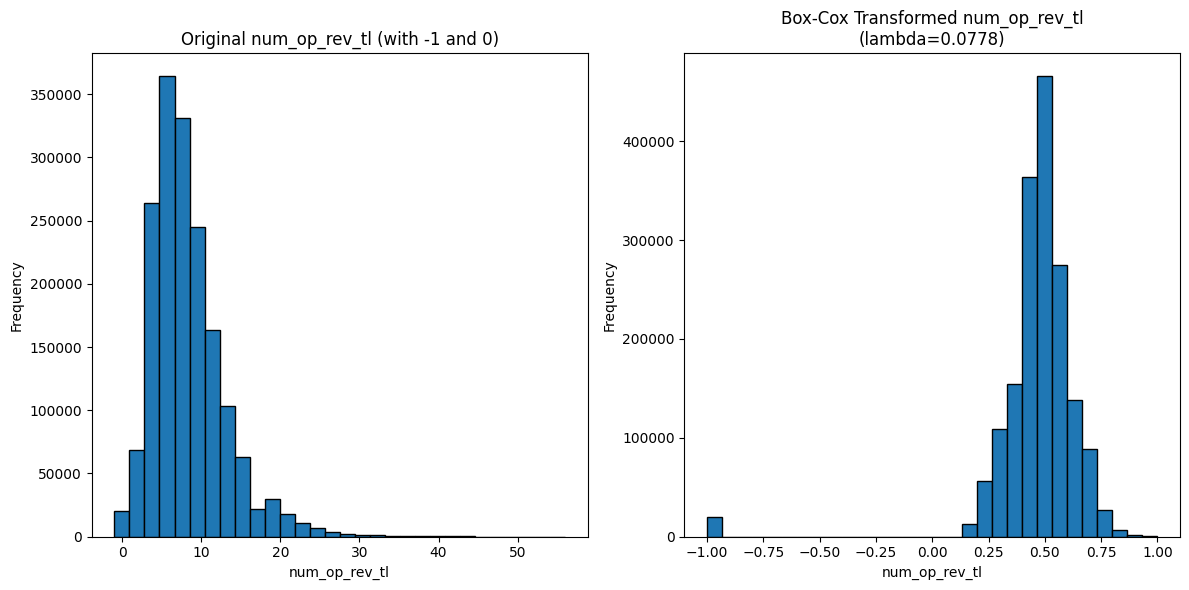

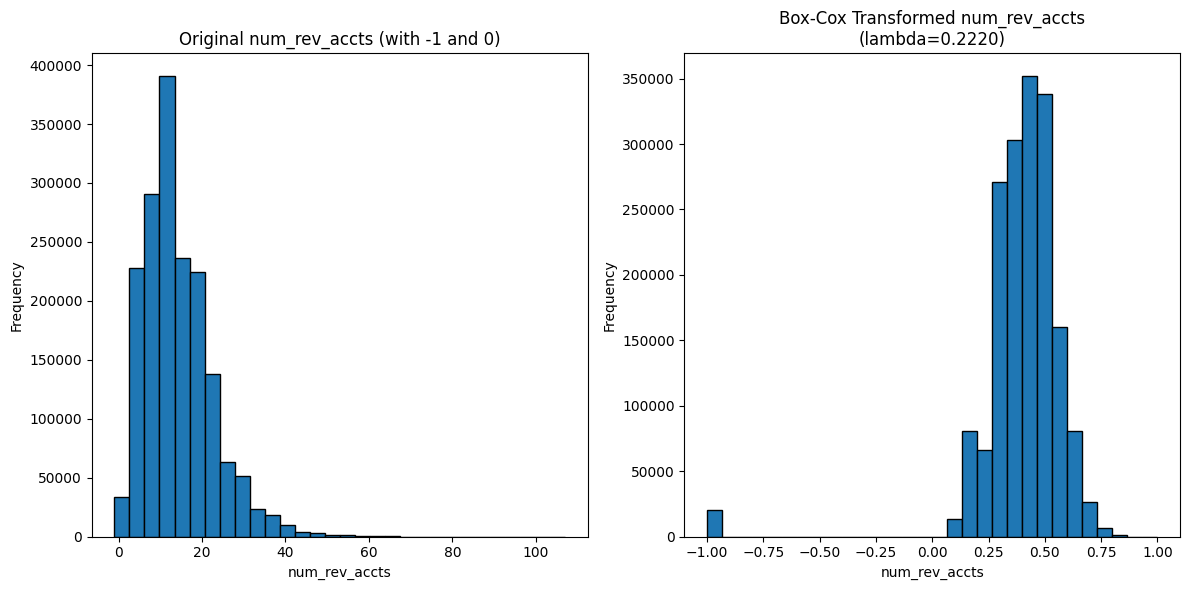

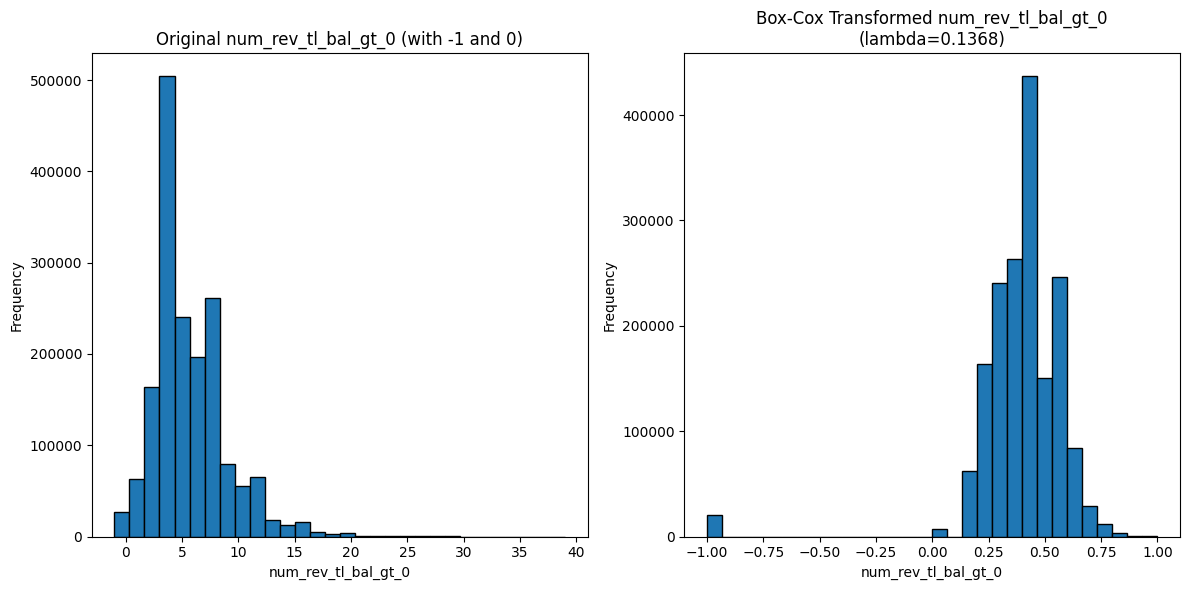

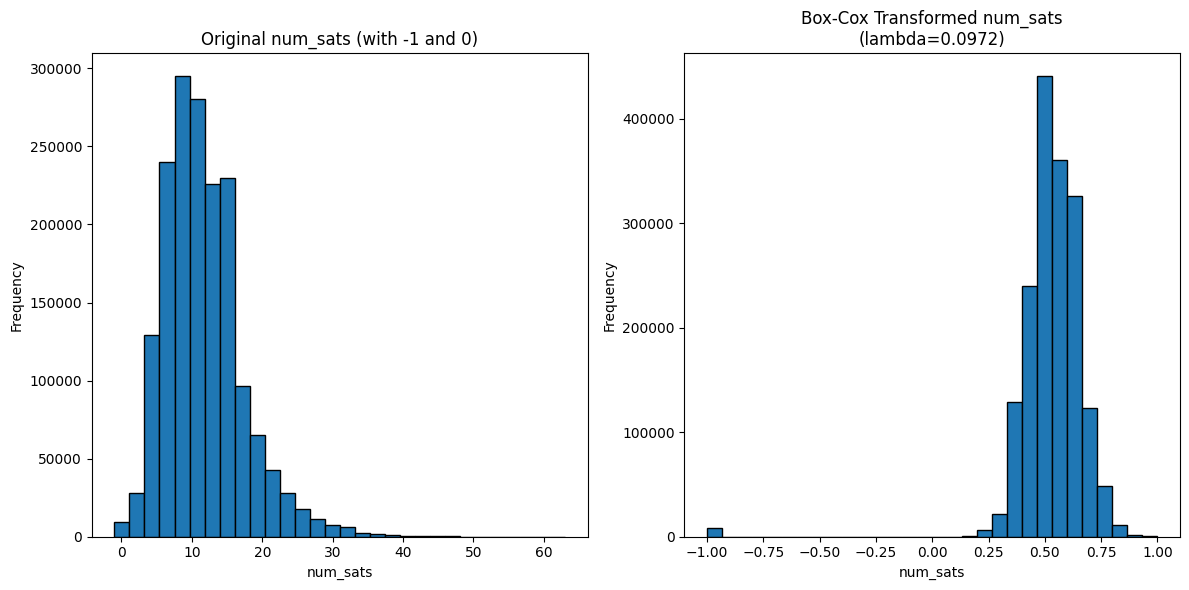

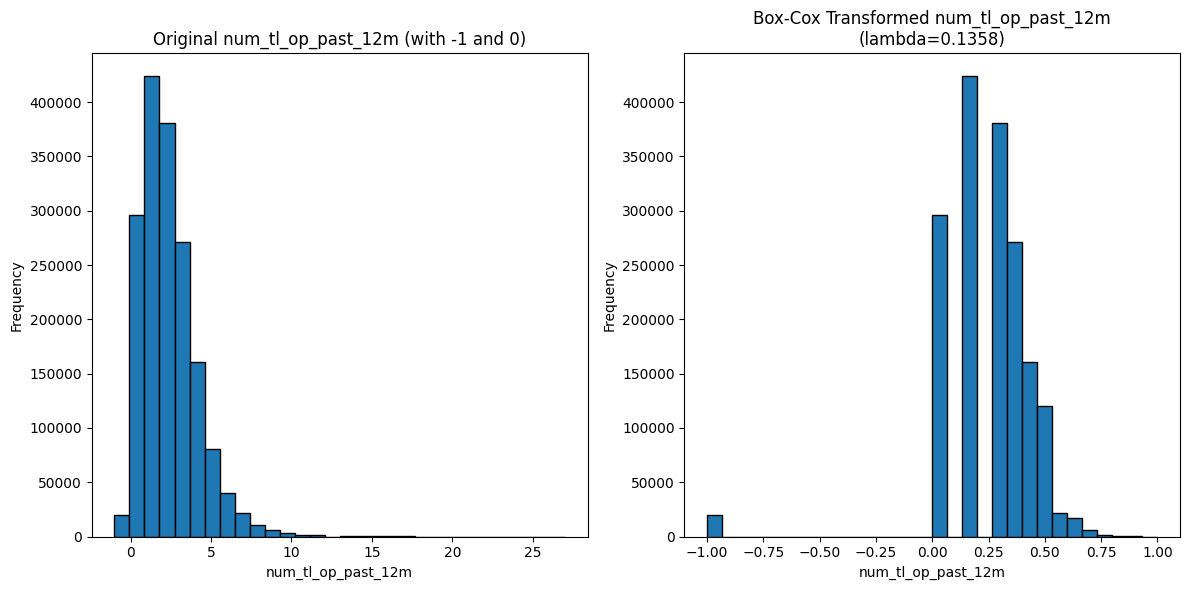

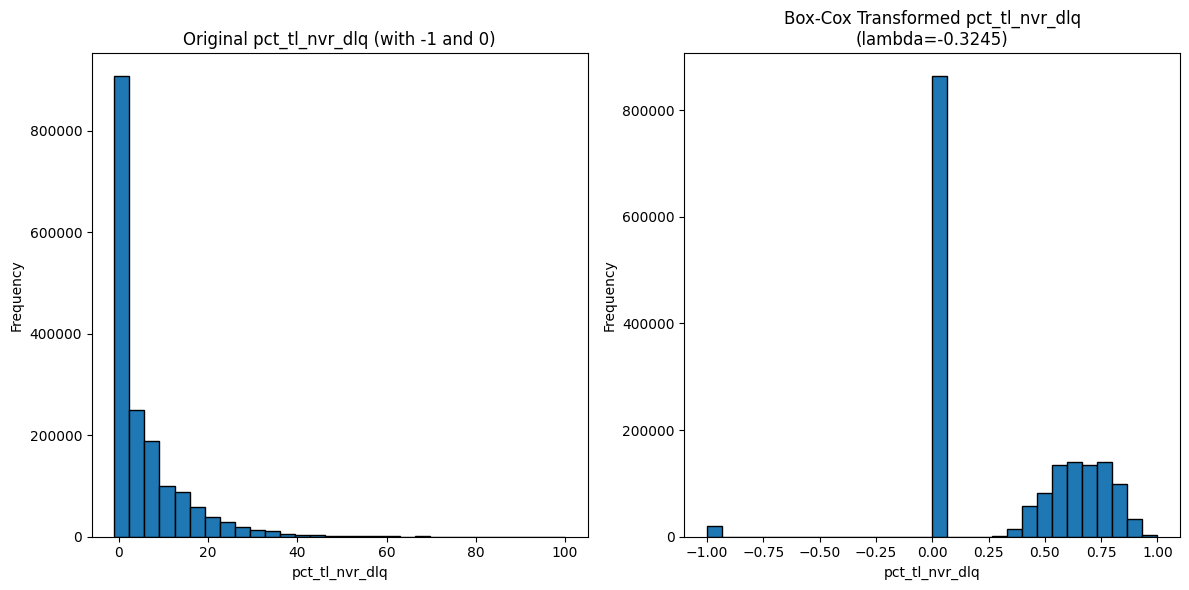

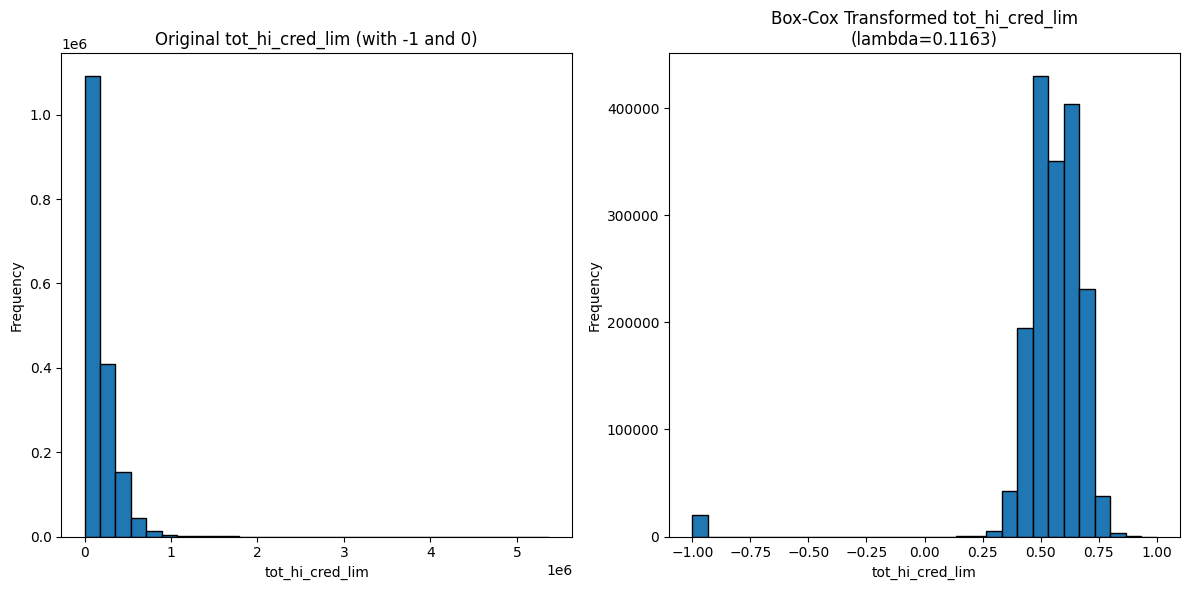

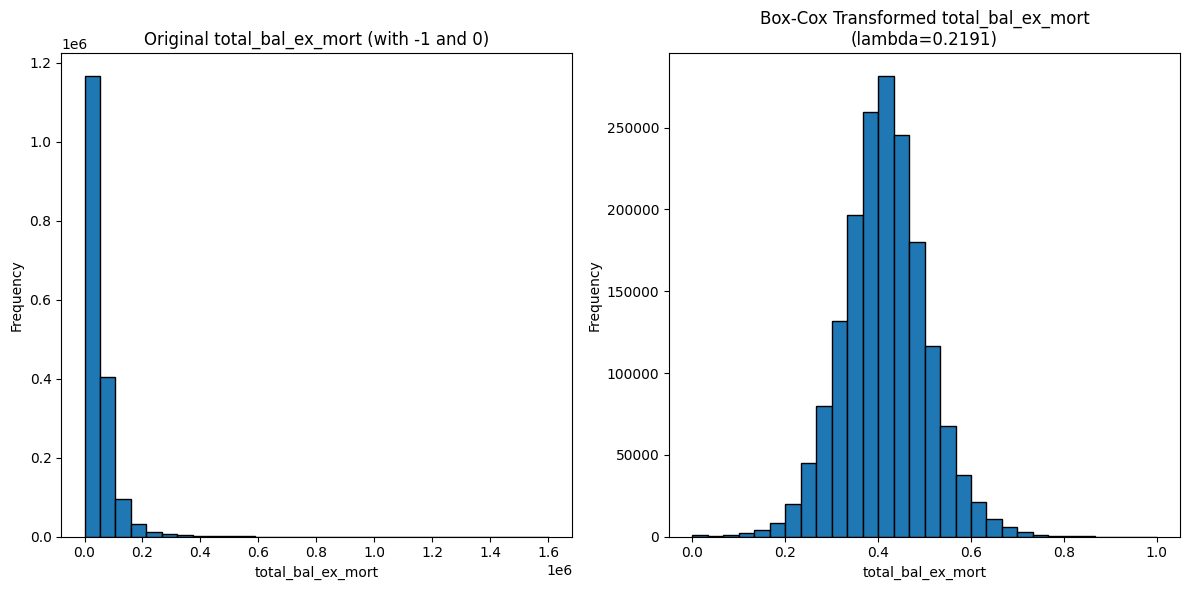

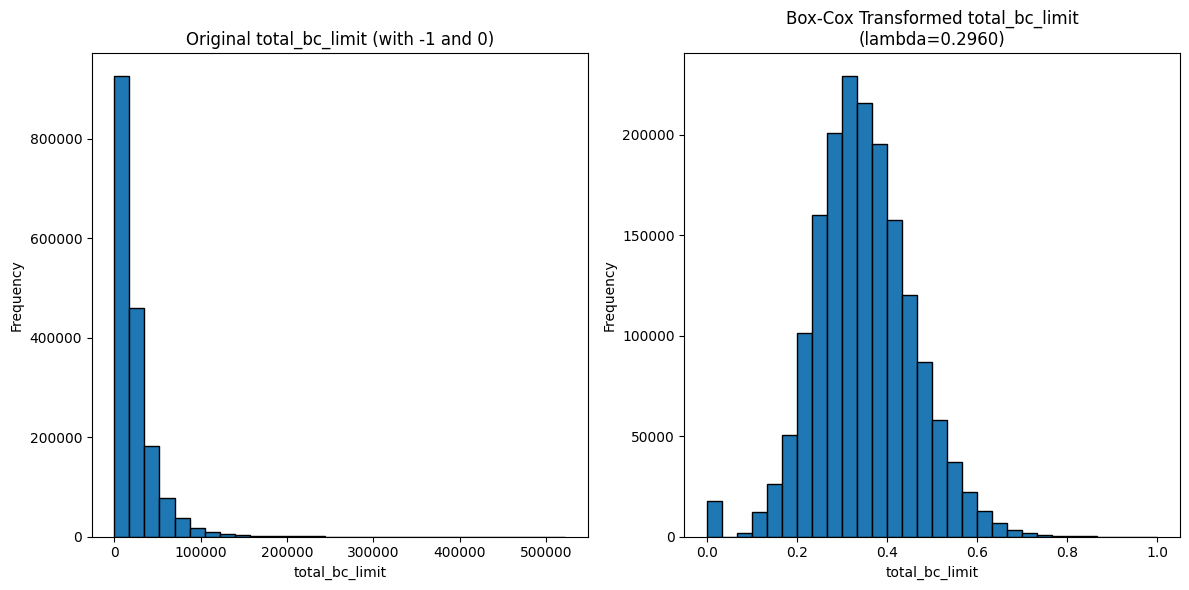

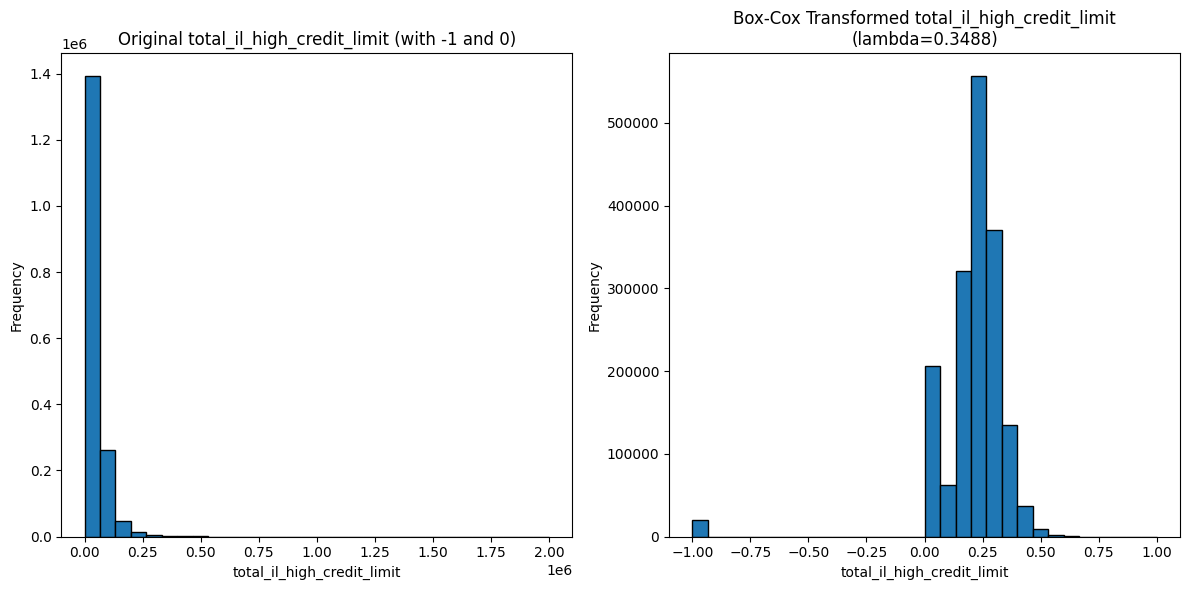

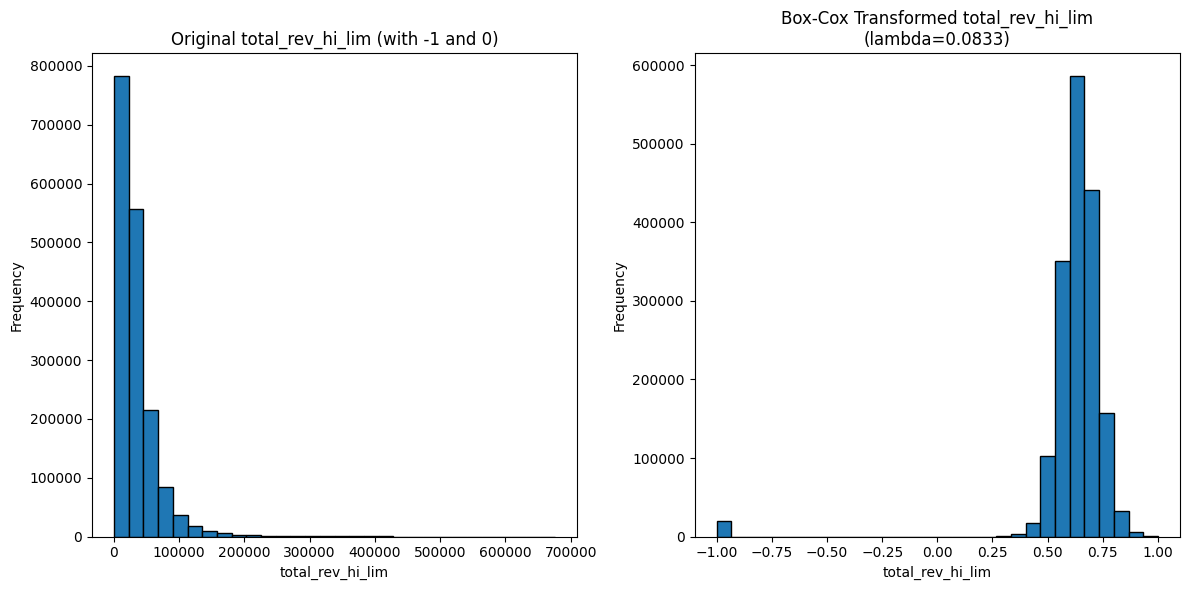

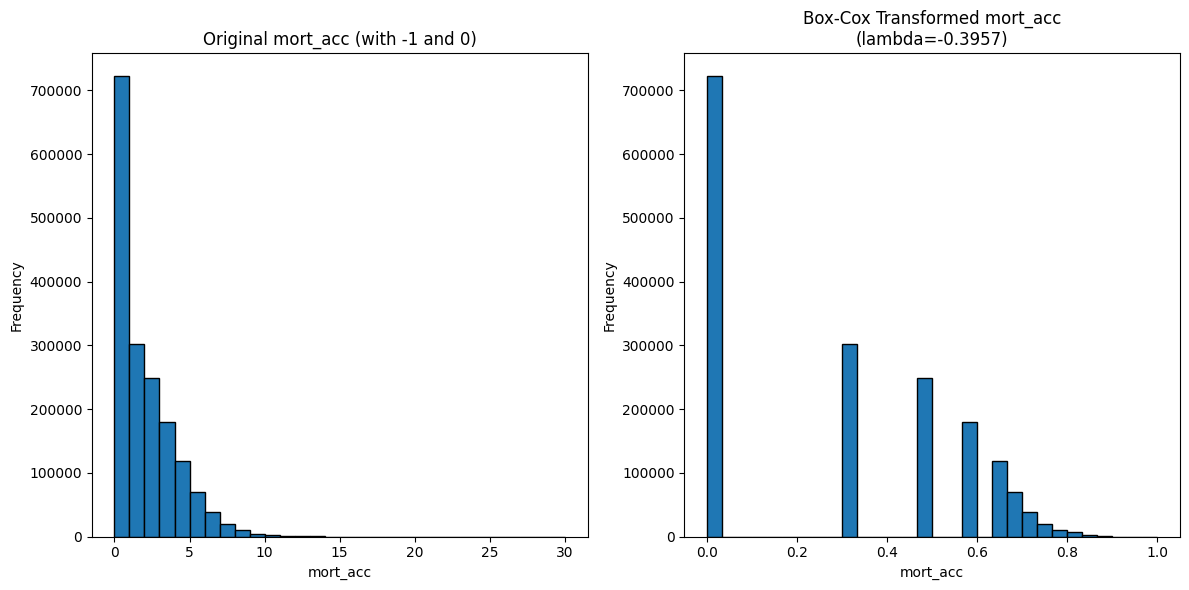

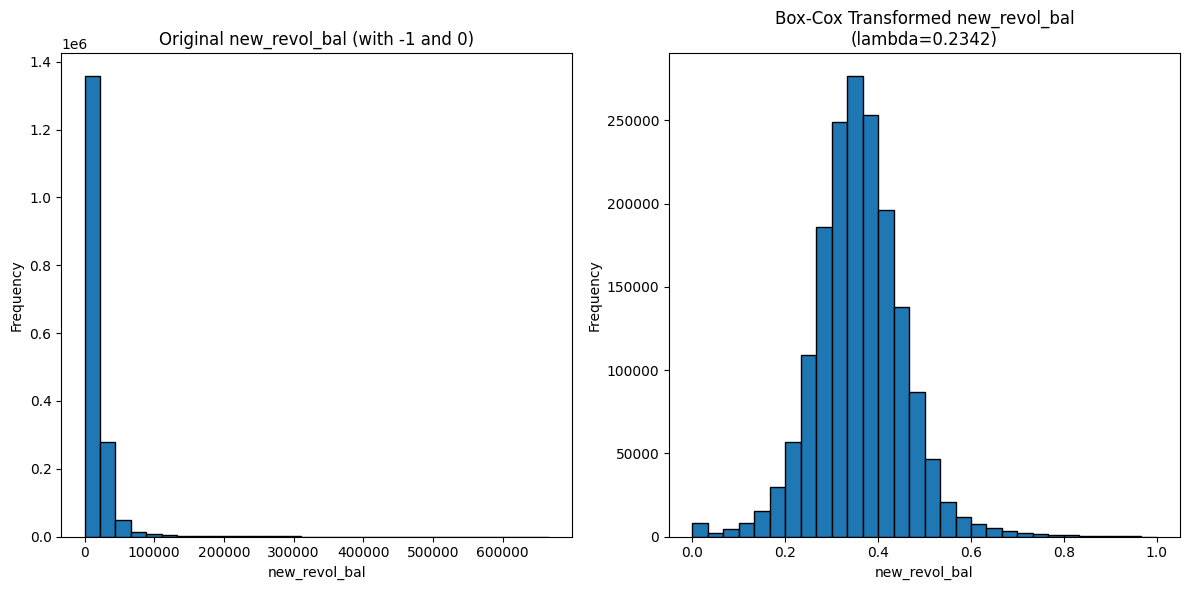

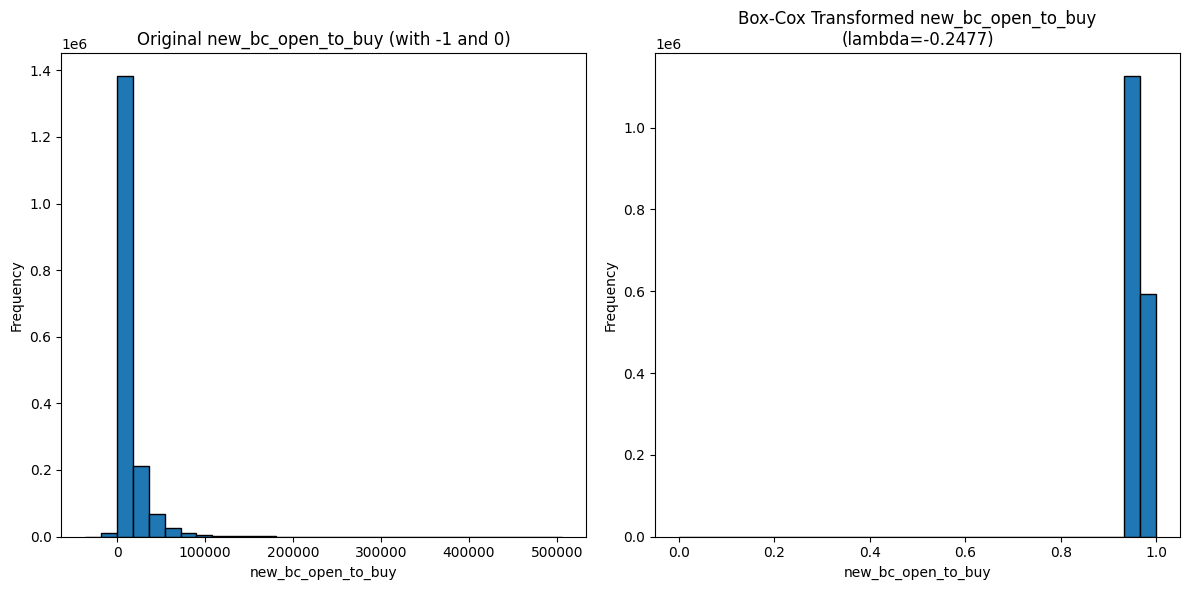

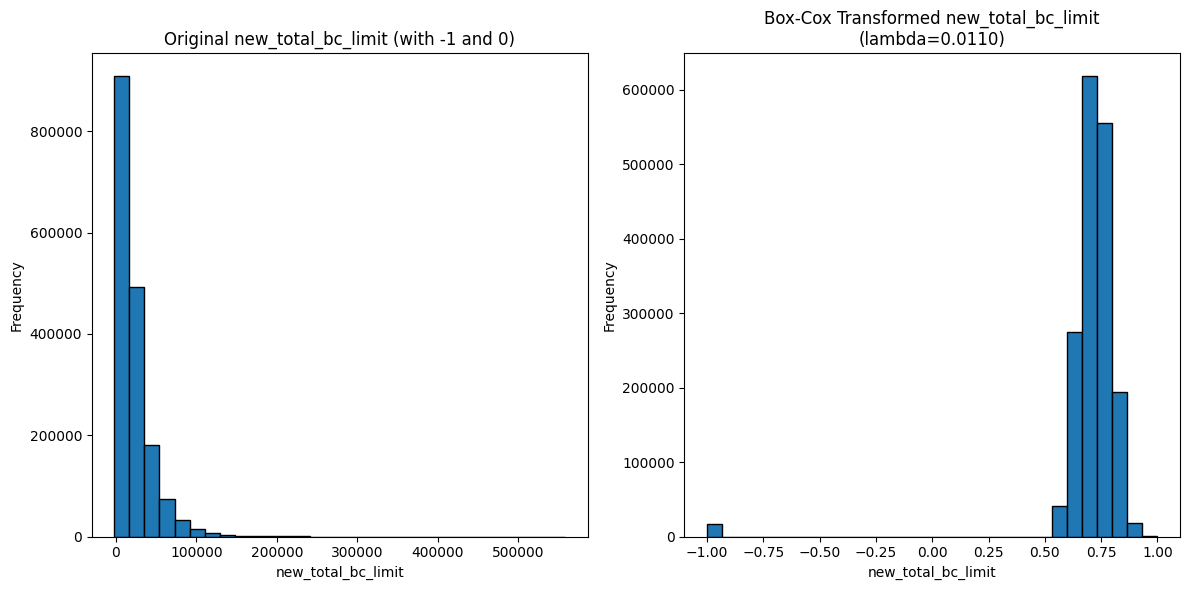

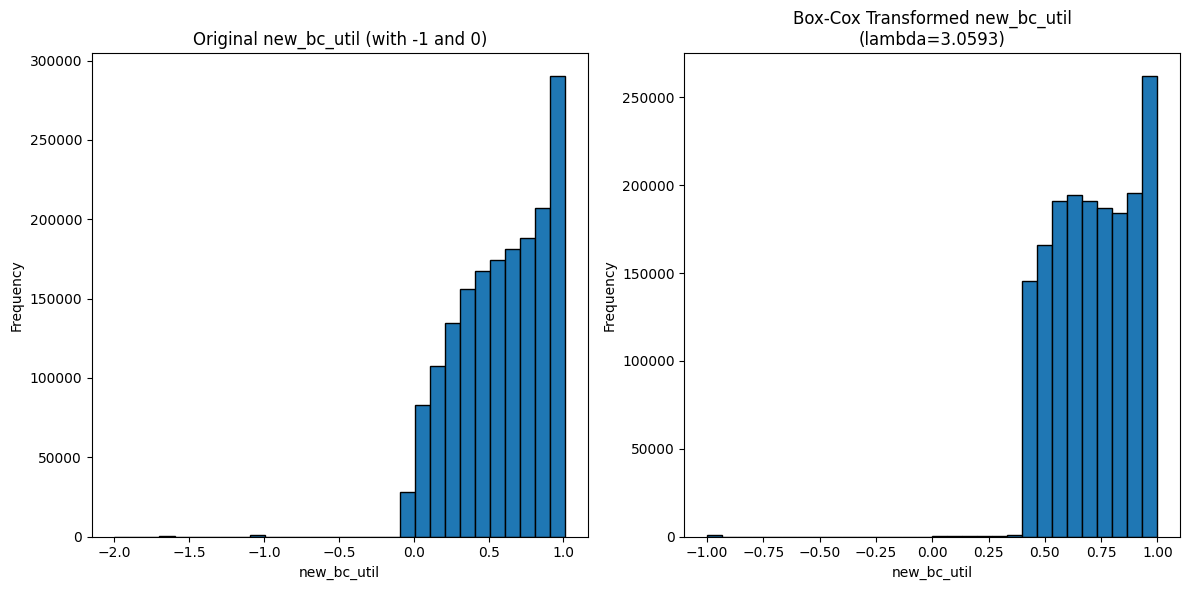

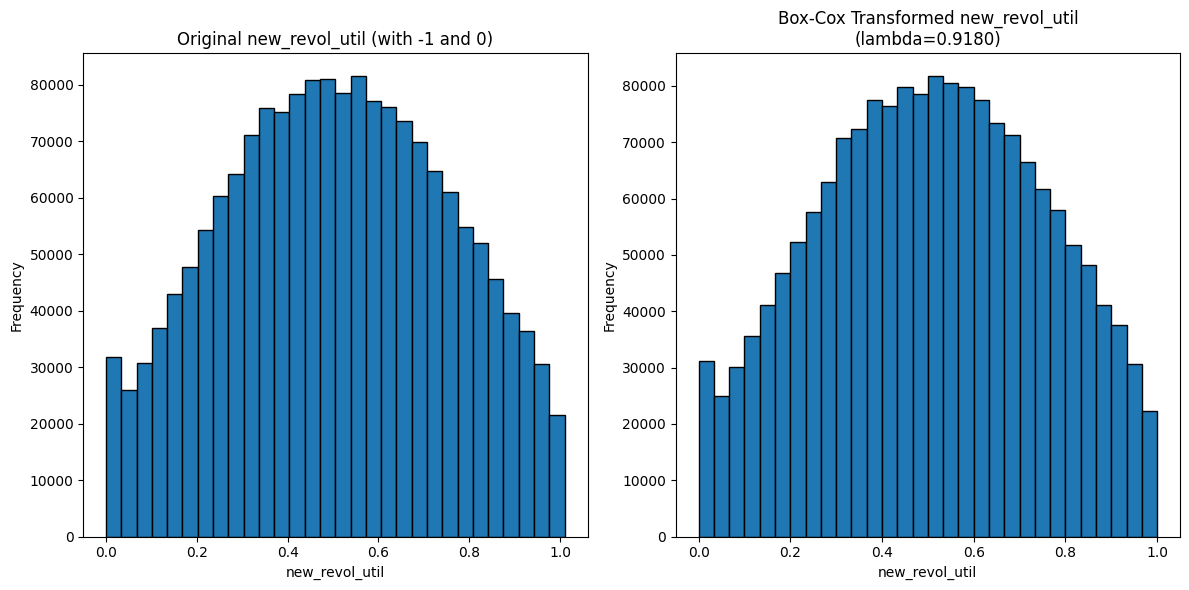

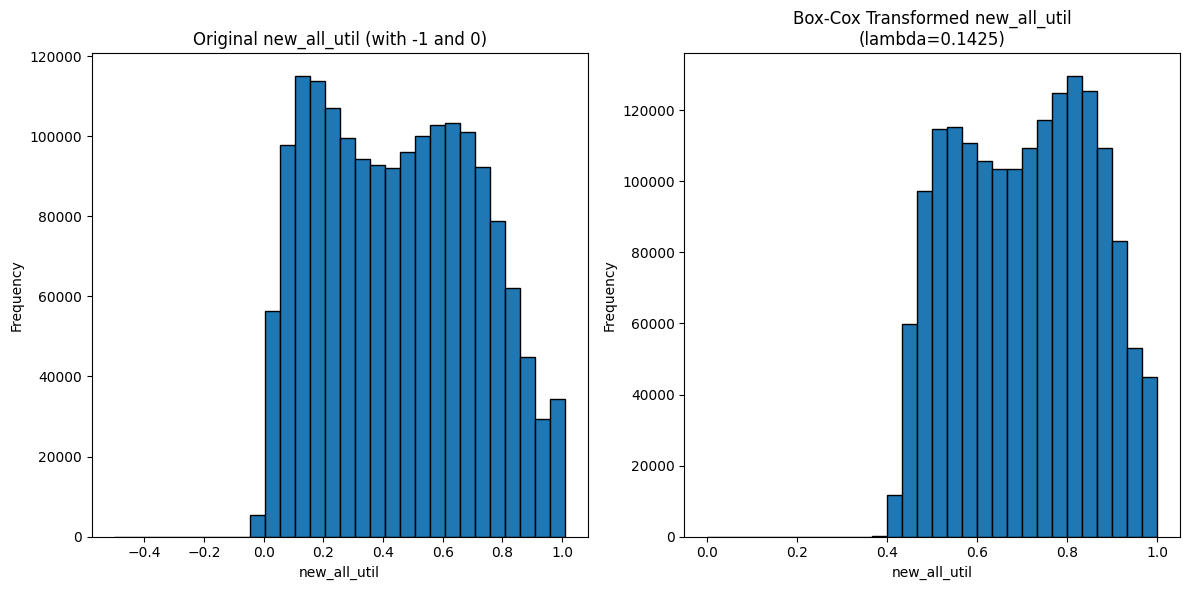

In [ ]:
column_list = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment','annual_inc','open_acc', 'total_acc','revol_bal', 'bc_open_to_buy', 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 'num_bc_sats',
                'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'tot_hi_cred_lim',
                'total_bal_ex_mort', 'total_bc_limit','total_il_high_credit_limit','total_rev_hi_lim', 'mort_acc',
                'new_revol_bal', 'new_bc_open_to_buy', 'new_total_bc_limit','new_bc_util','new_revol_util','new_all_util'
               ]
df, lambda_values = boxcox_transform_columns(df, column_list)

In [ ]:
len(df.columns)

56

In [ ]:
df

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,open_acc,total_acc,revol_bal,revol_util,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,pub_rec,pub_rec_bankruptcies,loan_status_N,new_total_rev_hi_lim,new_revol_bal,new_bc_open_to_buy,new_total_bc_limit,new_bc_util,new_revol_util,new_state,new_emp_length,new_purpose,ver_1,ver_2,home_1,home_2,home_3,home_4,home_5,fico_100,new_fico
0,0.563694,0.563693,3.0,0.361759,0.587450,0.778487,0.112683,0,0.322581,0.561196,0.331969,0.316027,0.240,0.451853,0.159,-1.000000,0.180476,0.000000,0,0.551368,0.480930,0.000000,0.651289,0.493823,0.501336,0.620902,0,0.426864,0.000000,0.000,0.456223,0.273704,0.356570,0.000000,0.659531,0,0,0,29737.500665,0.316027,0.968758,0.733790,0.474347,0.243073,1,5,0.212430,1,0,1,0,0,0,0,1,1
1,0.346961,0.346961,3.0,0.361759,0.411316,0.756397,0.060732,0,0.510753,0.193312,0.188605,0.272708,0.161,0.490563,0.161,0.142590,0.445179,0.000000,0,0.330817,0.299787,0.099791,0.308106,0.296591,0.247086,0.289576,0,0.000000,0.000000,0.000,0.445237,0.237729,0.397827,0.000000,0.645818,0,0,0,25689.441241,0.272708,0.970761,0.759244,0.475455,0.163528,1,3,0.177859,0,0,0,0,0,0,0,1,2
2,0.833293,0.833292,3.0,0.361759,0.791007,0.773939,0.557805,0,0.376344,0.542989,0.419342,0.484636,0.612,0.460425,0.539,0.157876,0.558330,0.633950,0,0.389387,0.432401,0.352990,0.554853,0.452460,0.375244,0.604467,0,0.172468,0.000000,0.250,0.584951,0.481292,0.440592,0.234238,0.728430,0,0,0,59866.014191,0.484636,0.969172,0.783717,0.677810,0.612477,1,11,0.212430,0,1,0,1,0,0,0,1,1
3,0.563694,0.563693,3.0,0.162503,0.576686,0.802692,0.307561,0,0.241935,0.594847,0.444125,0.372328,0.557,0.288240,0.835,0.164849,0.309500,0.322839,0,0.389387,0.480930,0.464964,0.504351,0.437240,0.423197,0.651164,0,0.361964,0.000000,1.000,0.633773,0.436384,0.334748,0.278061,0.638604,0,0,0,23784.560938,0.372328,0.963588,0.719585,0.870527,0.558344,1,4,0.212430,1,0,0,0,0,0,0,1,1
4,0.608142,0.608142,3.0,0.455643,0.628439,0.798073,0.244390,1,0.053763,0.337964,0.283522,0.264249,0.819,0.186179,0.877,0.150853,0.285623,0.000000,0,0.330817,0.457666,0.209829,0.360878,0.366261,0.375244,0.417979,0,0.000000,0.818431,1.000,0.461569,0.343880,0.218817,0.218826,0.492997,1,1,0,4500.610469,0.264249,0.962605,0.636032,0.900533,0.814900,1,5,0.212430,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719676,0.787641,0.787641,5.0,0.849702,0.723122,0.807824,0.284146,1,0.053763,0.523699,0.392694,0.342824,0.249,0.486753,0.260,0.125820,0.493506,0.000000,1,0.480714,0.502515,0.279364,0.597501,0.493823,0.501336,0.587011,1,0.281145,0.734553,0.000,0.558656,0.465000,0.409487,0.297291,0.685558,1,1,1,38907.630839,0.342824,0.970555,0.766067,0.523788,0.252108,0,1,0.207264,0,0,1,0,0,0,0,0,1
1719677,0.514514,0.514513,3.0,0.186433,0.539326,0.782636,0.476829,1,0.349462,0.561196,0.419342,0.343413,0.157,0.513543,0.246,0.200163,0.513724,0.000000,0,0.517990,0.522666,0.247604,0.616599,0.552138,0.534225,0.620902,0,0.281145,0.642416,0.143,0.580755,0.455591,0.437118,0.306530,0.732082,0,0,0,62108.278180,0.343413,0.972071,0.781746,0.516754,0.159488,1,11,0.212430,0,0,0,0,0,0,0,1,1
1719678,0.515813,0.515812,3.0,0.631410,0.567451,0.752690,0.501463,0,0.241935,0.561196,0.363765,0.379867,0.470,0.305149,0.661,0.171774,0.517902,0.000000,0,0.330817,0.299787,0.209829,0.651289,0.493823,0.662430,0.620902,0,0.481370,0.559958,0.000,0.458008,0.326224,0.286084,0.000000,0.661755,0,0,1,30425.531992,0.379867,0.963880,0.685960,0.753396,0.472392,1,9,0.212430,1,0,1,0,0,0,0,1,1
1719679,0.393

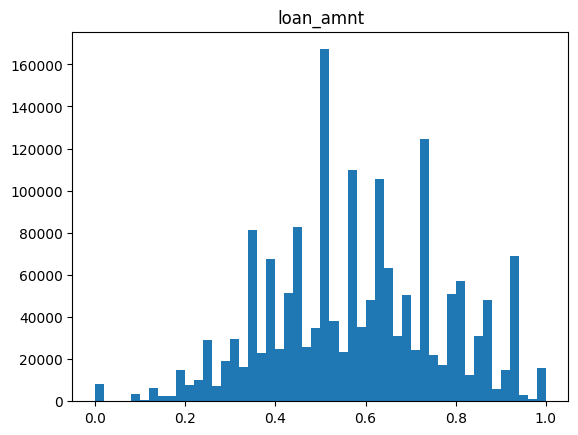

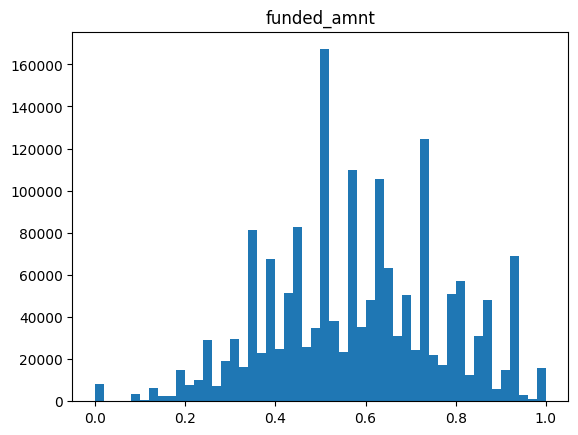

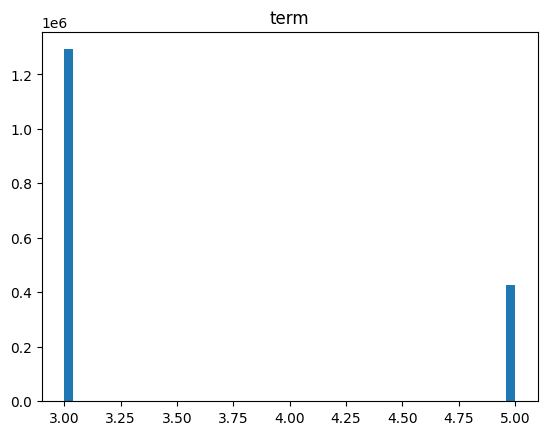

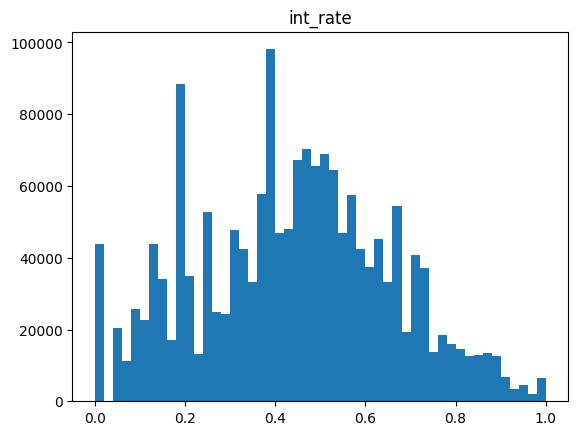

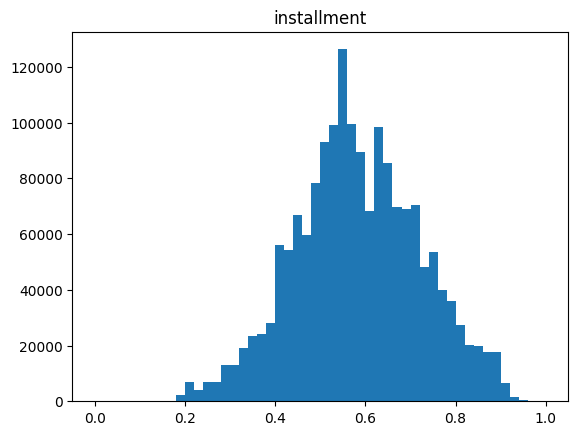

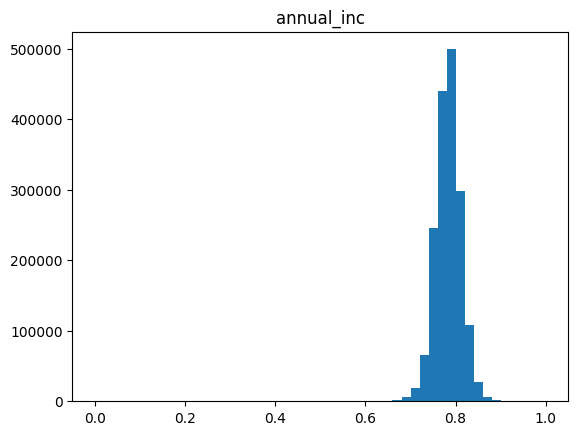

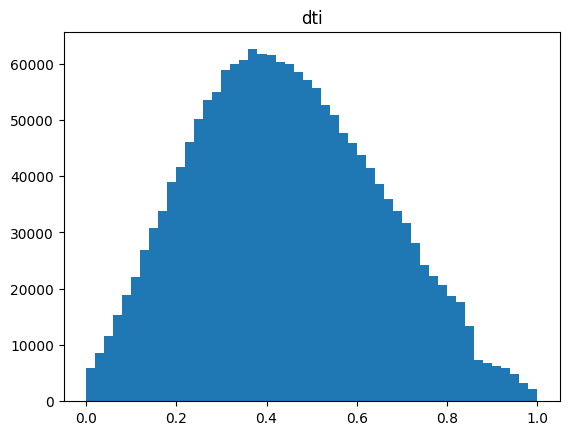

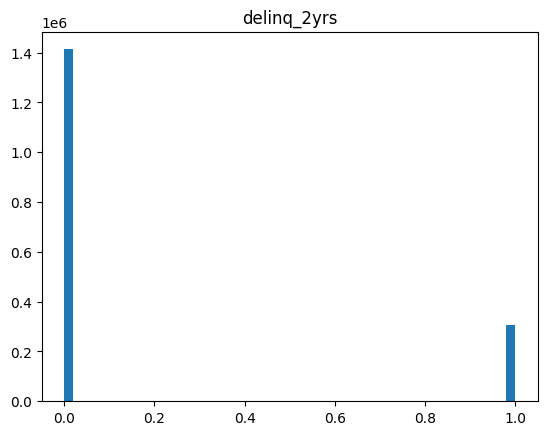

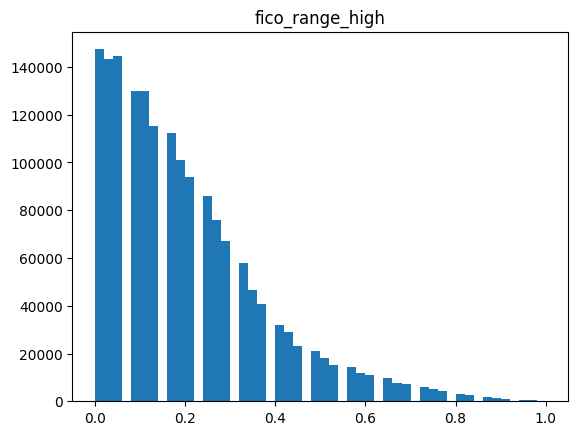

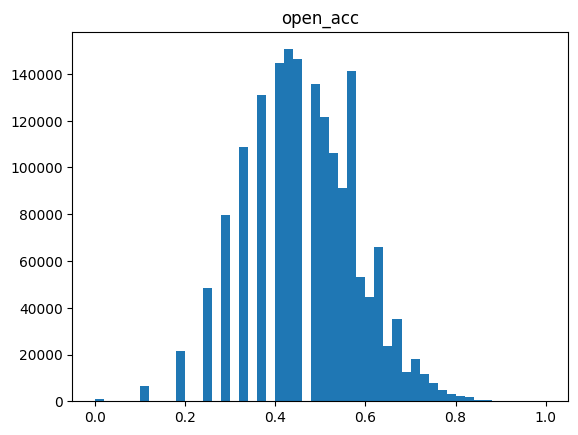

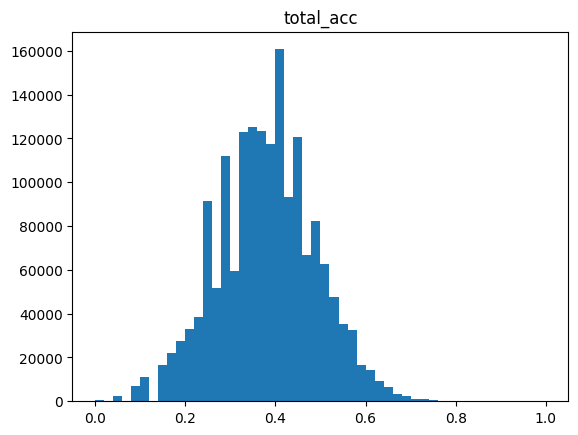

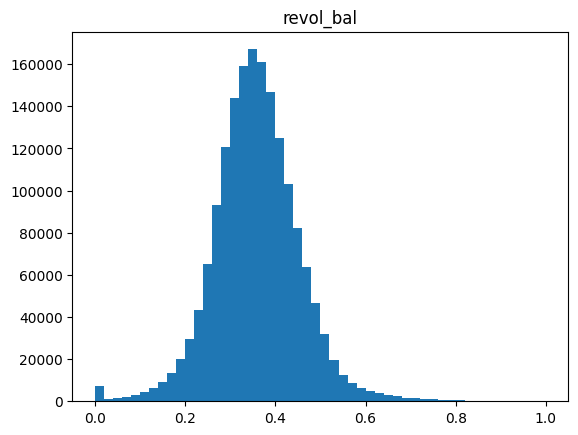

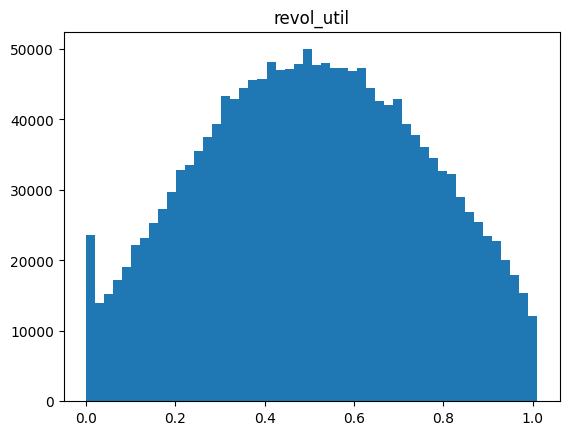

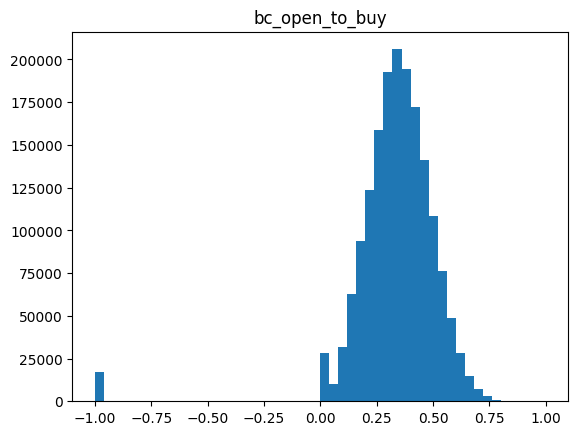

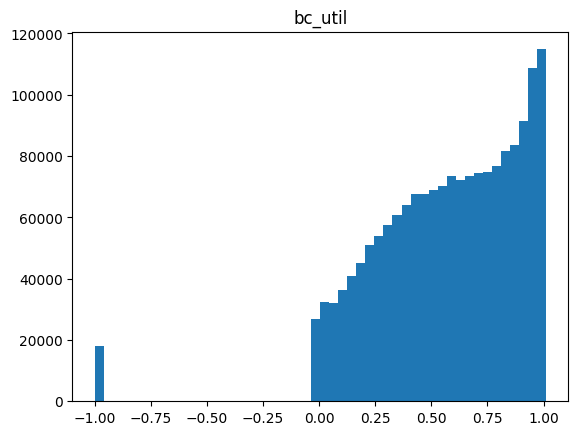

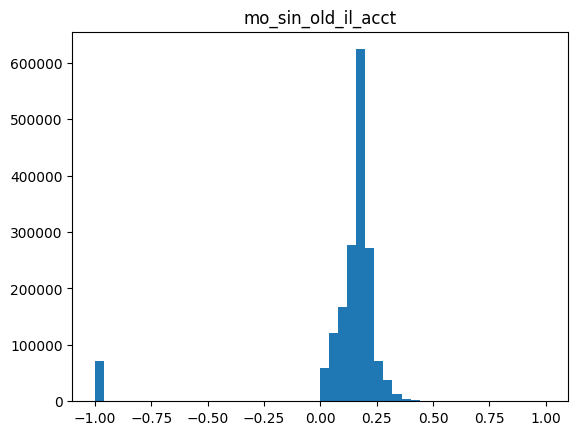

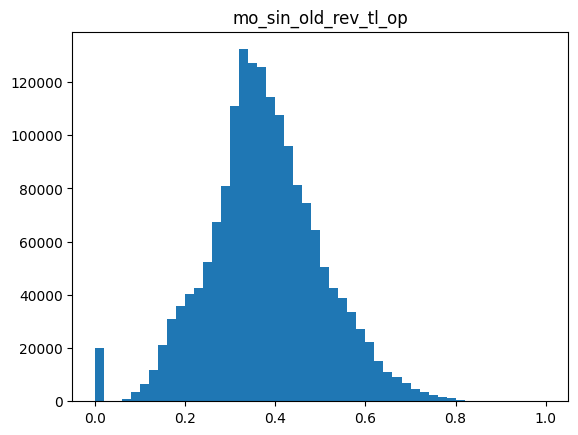

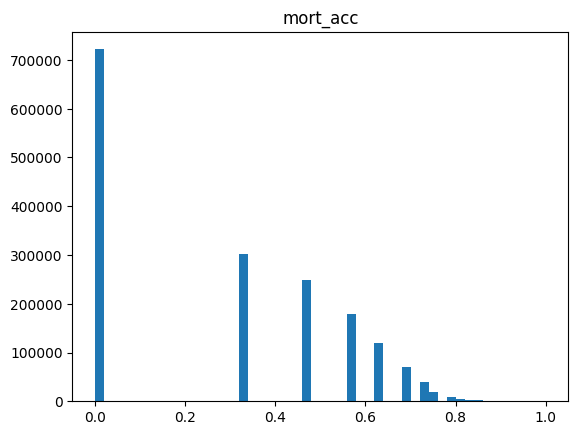

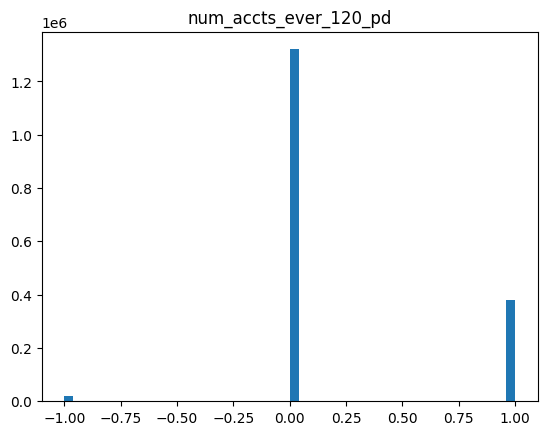

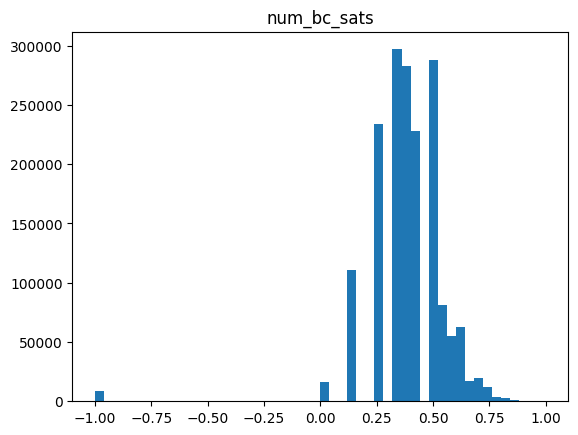

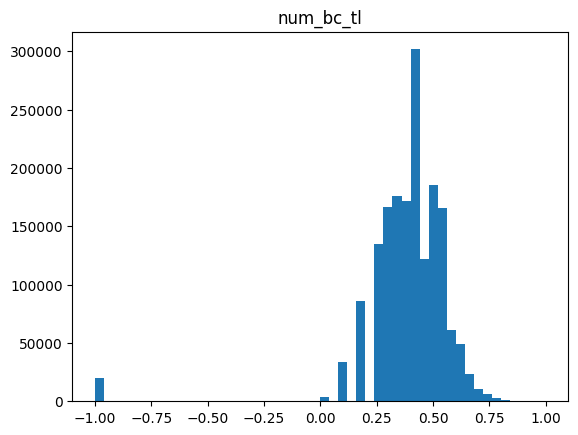

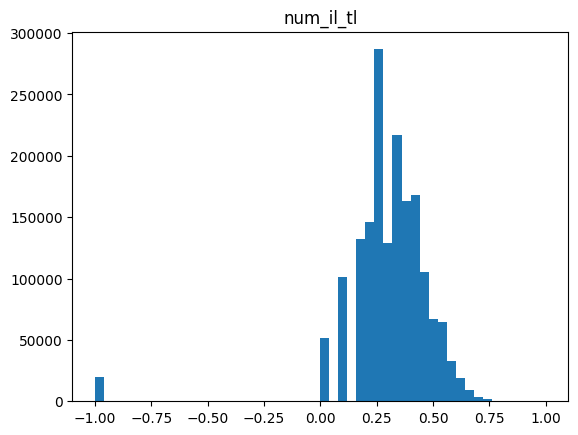

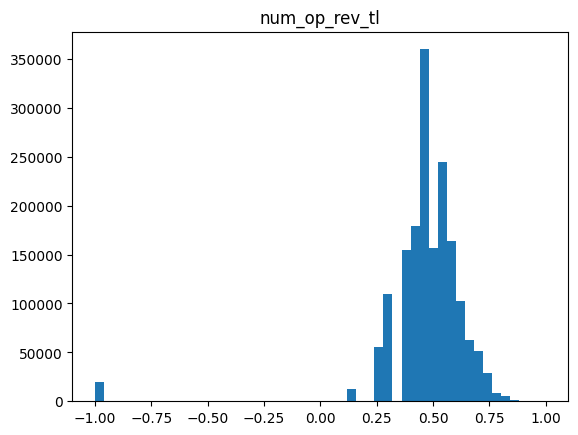

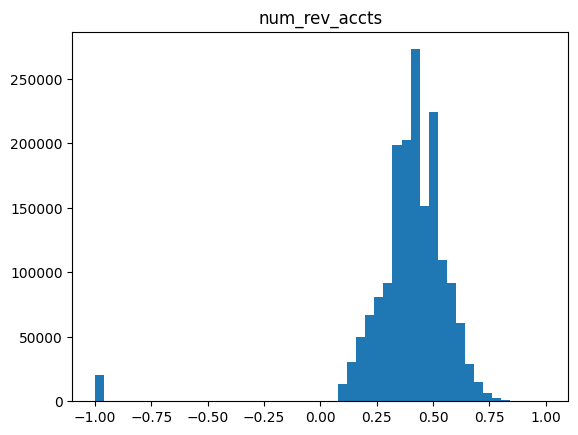

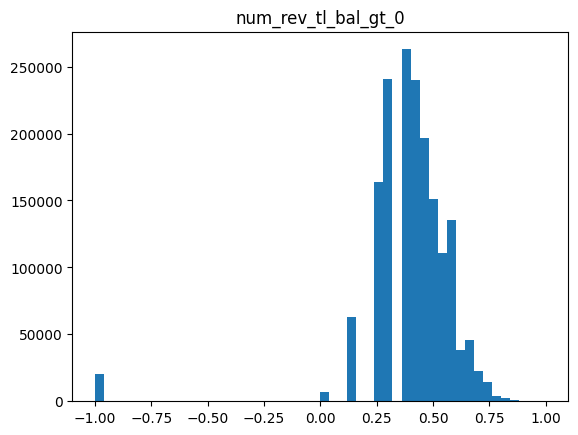

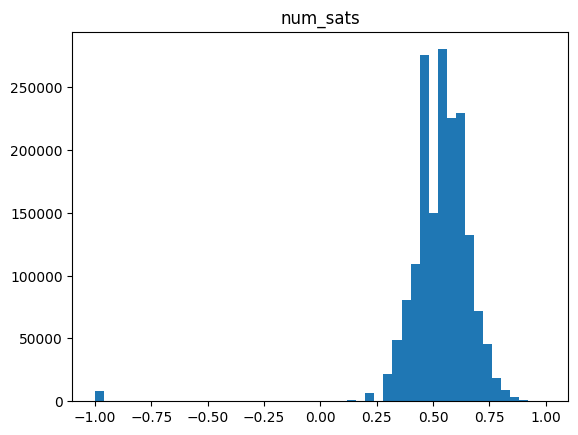

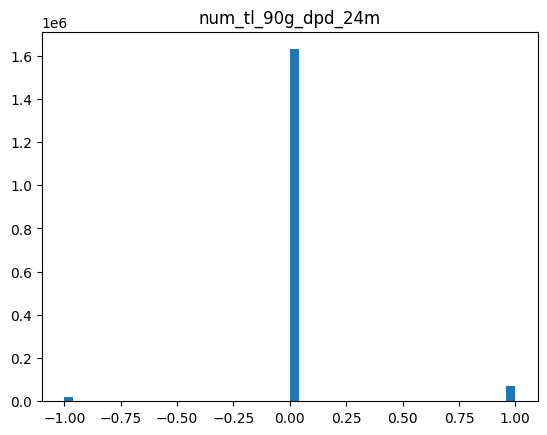

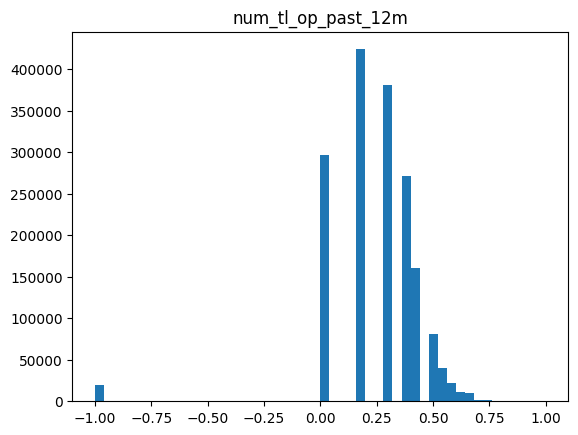

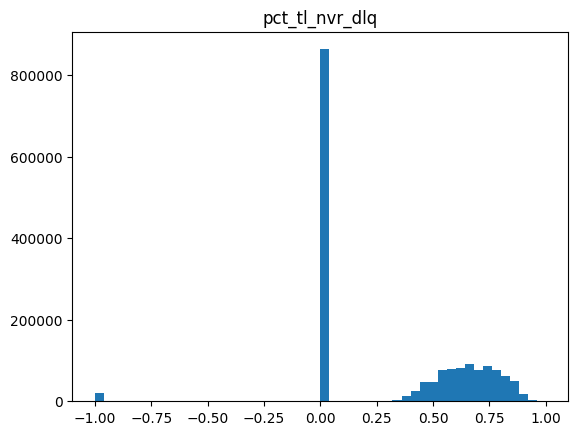

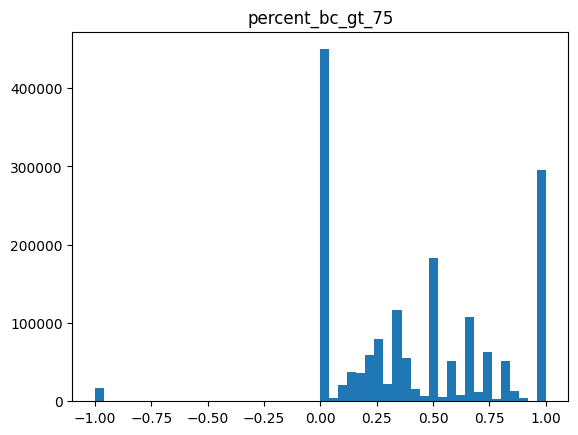

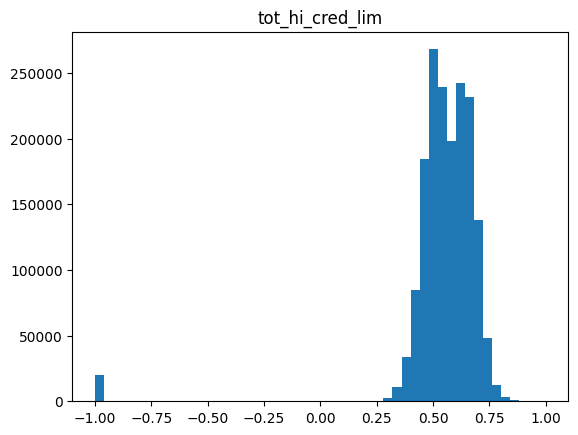

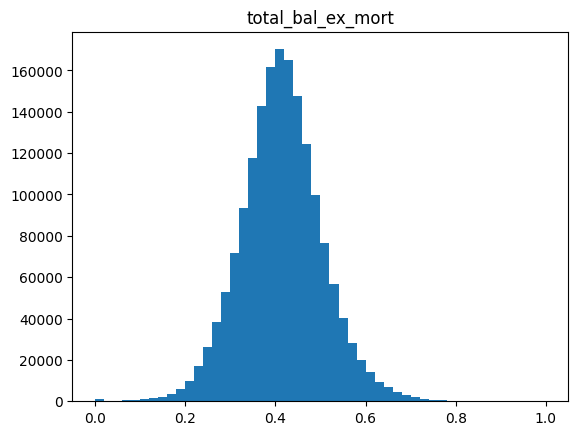

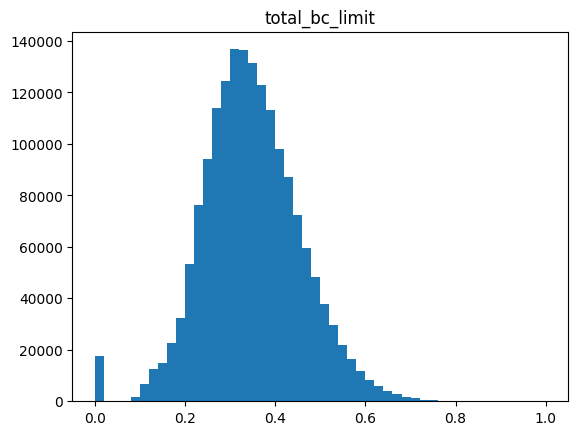

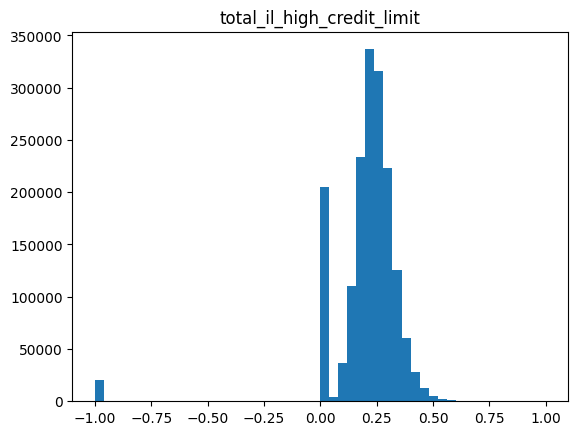

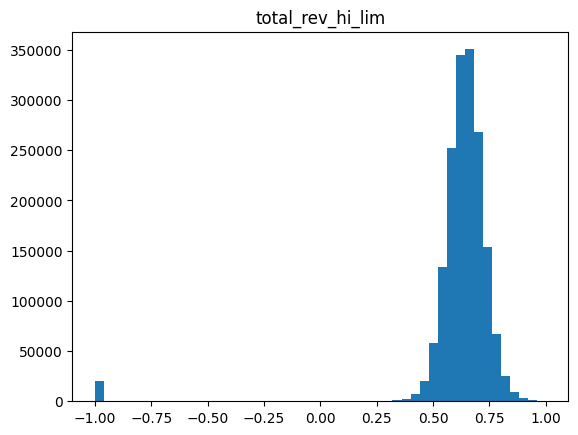

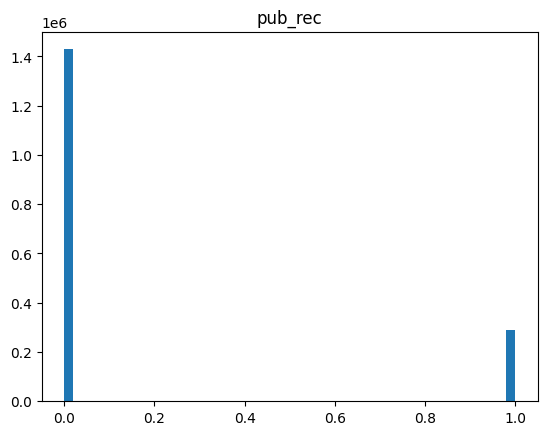

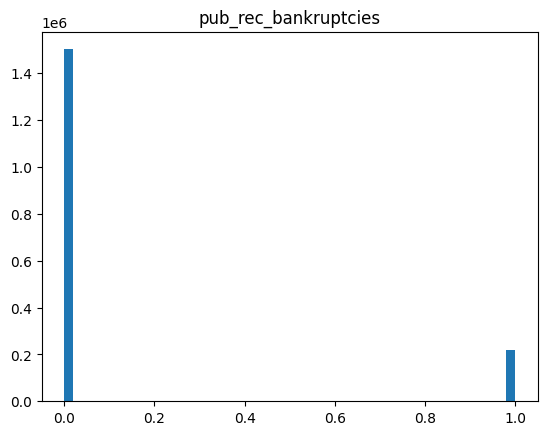

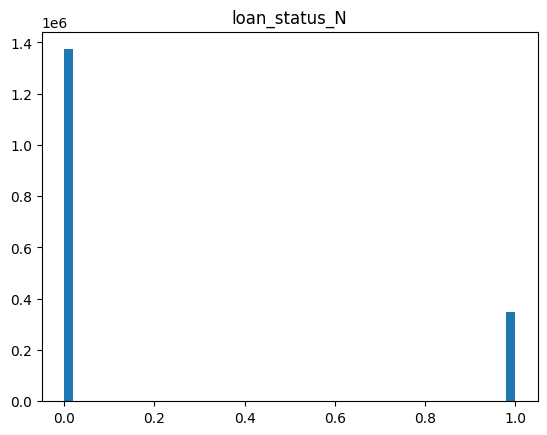

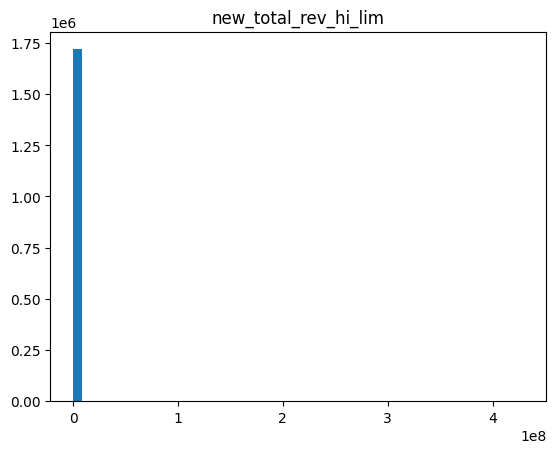

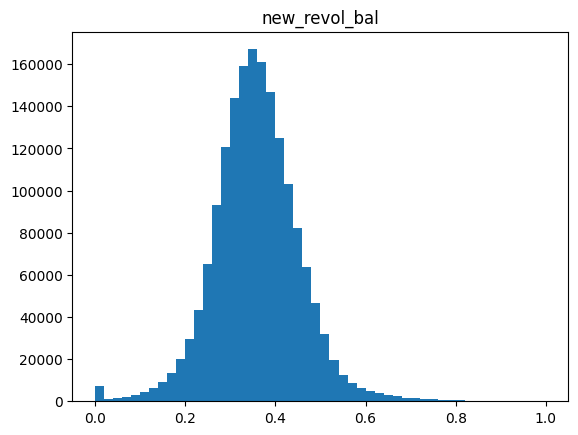

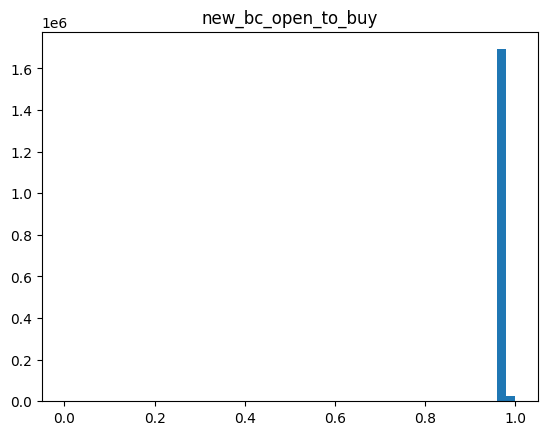

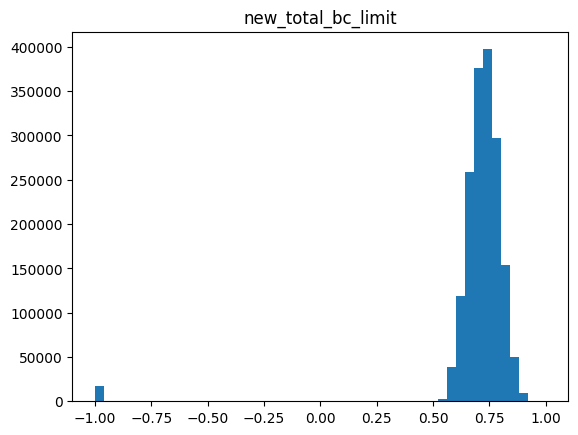

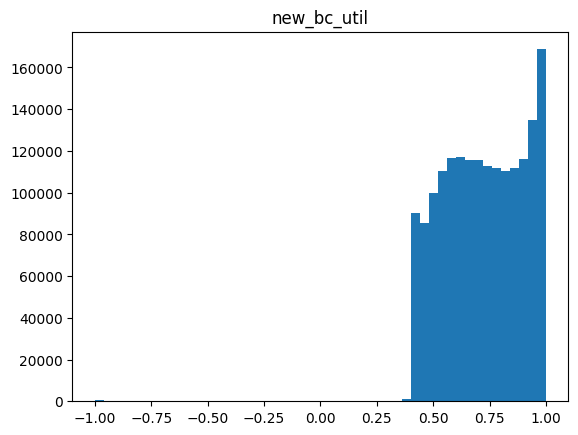

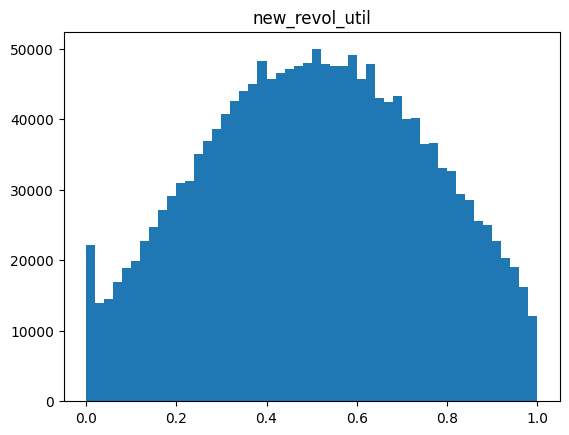

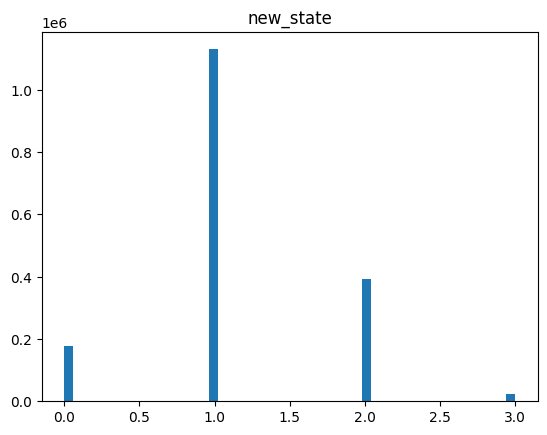

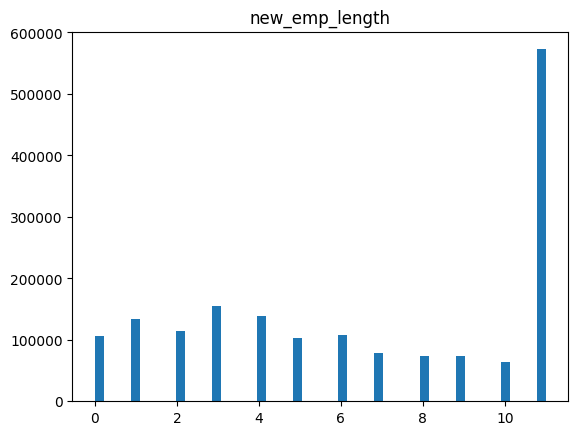

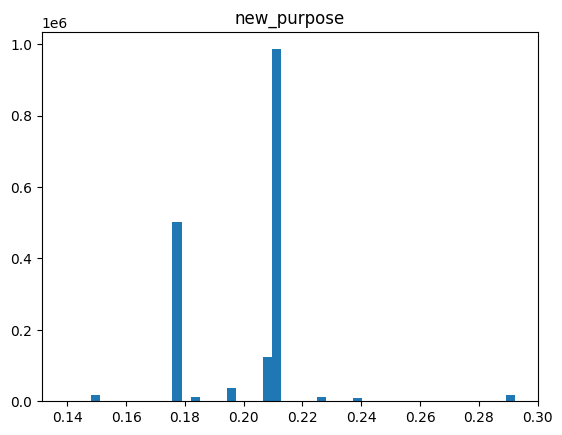

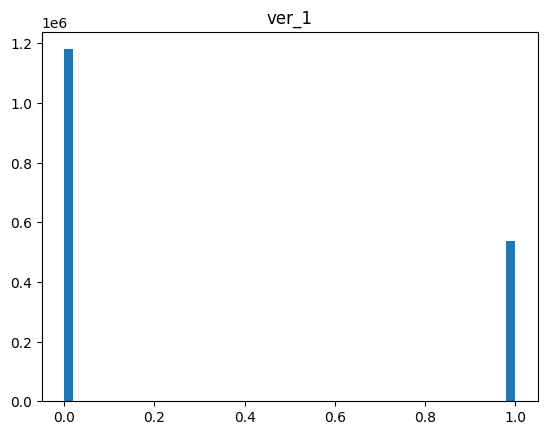

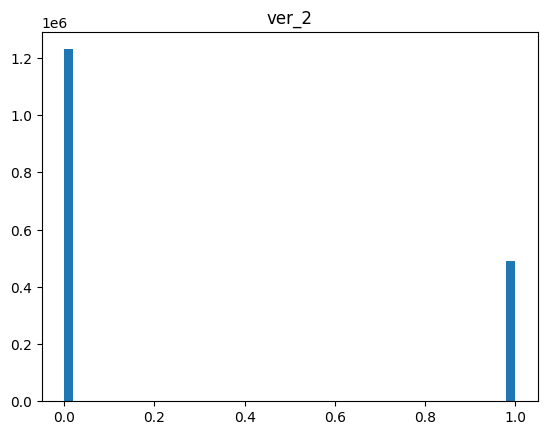

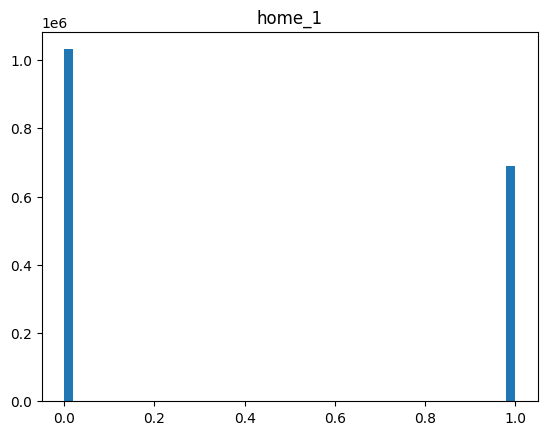

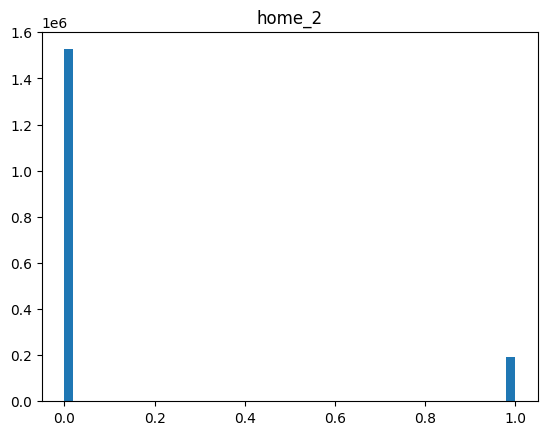

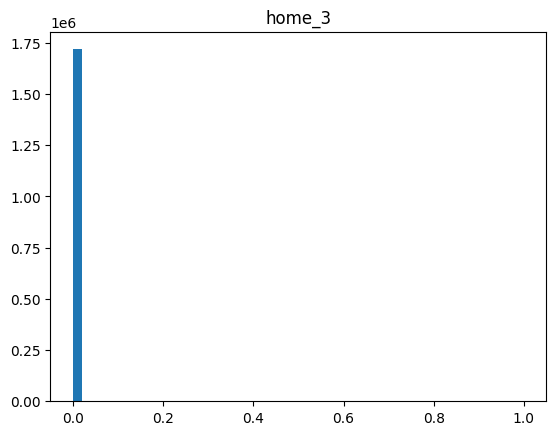

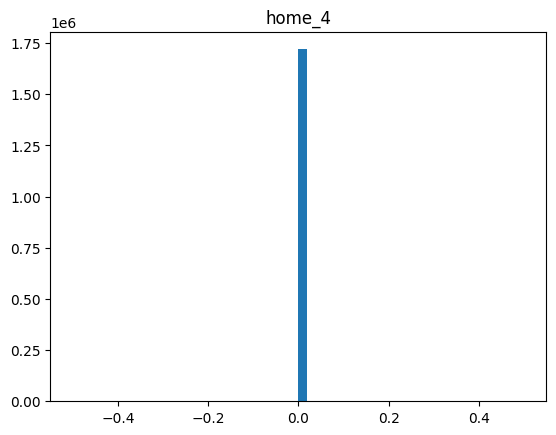

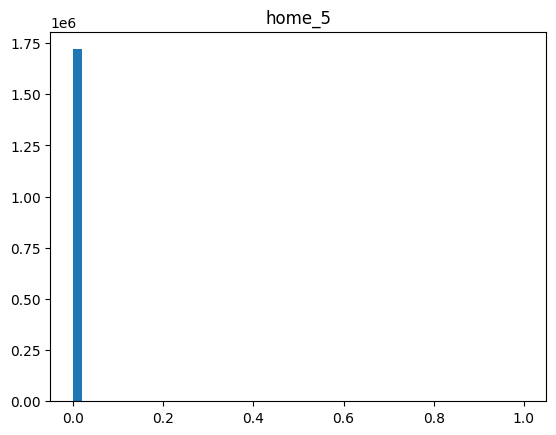

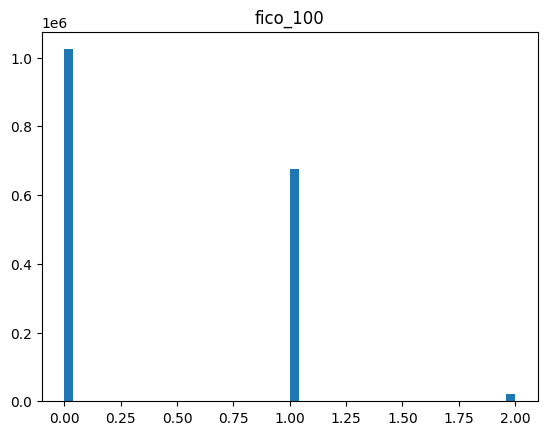

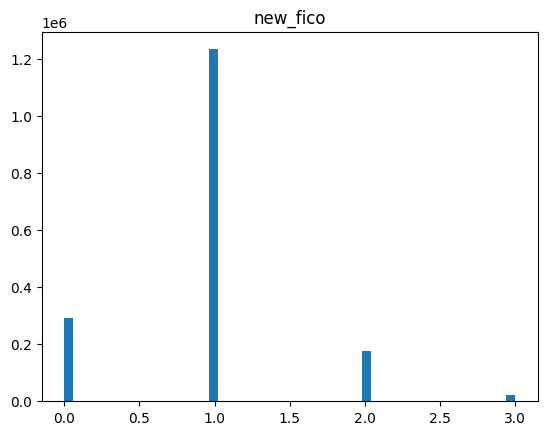

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(df.columns)) :
    plt.hist(df[df.columns[i]], bins=50)
    plt.title(f'{df.columns[i]}')
    plt.show()

## 타겟 변수 변환

In [ ]:
df = pd.read_feather('/content/drive/MyDrive/ASAC5기_상환예측/Data/lending_club_clean.feather')

In [ ]:
df.loan_status.value_counts()

,count
loan_status,
Fully Paid,1497783
Current,1031016
Charged Off,362548
Late (31-120 days),16154
In Grace Period,10028
Late (16-30 days),2719
Issued,2062
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761


In [ ]:
# 타겟 변수 loan status 인코딩
delete = [
    'Does not meet the credit policy. Status:Fully Paid',
    'Does not meet the credit policy. Status:Charged Off',
    'Issued',
    'Current',
    'In Grace Period',
]


df = df[~df['loan_status'].isin(delete)].reset_index(drop = True)

# 우량 대출 0, 불량 대출 1 로 변환
df['loan_status_N'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

In [ ]:
df[['loan_status','loan_status_N']].drop_duplicates()

,loan_status,loan_status_N
0,Fully Paid,0
1,Charged Off,1
227968,Late (31-120 days),1
230940,Late (16-30 days),1
233616,Default,1


In [ ]:
len(df)

1879637

In [ ]:
df.loan_status_N.value_counts()

,count
loan_status_N,
0,1497783
1,381854


In [ ]:
df.to_feather('/content/drive/MyDrive/ASAC5기_상환예측/Data/lending_club_clean_N.feather')

# 범주형 데이터 인코딩

##emp_length -> 라벨인코딩

In [ ]:
emp_length_N=['Unemployed',
'< 1 year',
'1 year',
'2 years',
'3 years',
'4 years',
'5 years',
'6 years',
'7 years',
'8 years',
'9 years',
'10+ years']

In [ ]:
def emp_length1(value):
  if value in emp_length_N:
    return emp_length_N.index(value)

In [ ]:
df['new_emp_length'] = df['emp_length'].apply(emp_length1)

In [ ]:
df["new_emp_length"].value_counts()

,count
new_emp_length,
11,449679
3,128395
4,114212
1,111008
2,94502
6,88162
5,85106
0,84132
7,65096


##purpose -> 비율로 대체

In [ ]:
# 'other'와 'education'을 'other'으로 변환
df['purpose'] = df['purpose'].replace({'educational': 'other'})

# purpose 별로 loan_status_N 합계 계산
loan_status_sum = df.groupby('purpose', as_index=False)['loan_status_N'].sum()

# purpose 별로 행의 수 계산
purpose_counts = df['purpose'].value_counts().reset_index()
purpose_counts.columns = ['purpose', 'count']

# 합계 DataFrame과 행의 수 DataFrame을 병합
merged = pd.merge(loan_status_sum, purpose_counts, on='purpose')

# n / count 비율 계산
merged['bad_ratio'] = 1 - (merged['loan_status_N'] / merged['count'])

# 결과 출력
result = merged.sort_values('loan_status_N', ascending=False).reset_index(drop=True)
result

<ipython-input-162-17eb3ef7f241>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_status_sum = df.groupby('purpose', as_index=False)['loan_status_N'].sum()


,purpose,loan_status_N,count,bad_ratio
0,debt_consolidation,632626,802921,0.212094
1,credit_card,261485,317539,0.176526
2,home_improvement,70141,85317,0.177878
3,other,66755,84284,0.207975
4,major_purchase,24192,30107,0.196466
5,medical,12876,16243,0.207289
6,car,12288,14474,0.151029
7,small_business,9621,13653,0.295320
8,vacation,8147,9977,0.183422
9,moving,7555,9762,0.226081


In [ ]:
u = df['purpose'].unique()

for i in u:
    b = sum(df[df['purpose'] == i]['loan_status_N'] == 1)
    c = (b / len(df)) / (len(df[df.loan_status_N == 1])/len(df))
    print(f"Purpose: {i}, Normalized Ratio: {c}")

Purpose: debt_consolidation, Normalized Ratio: 0.5684277678940464
Purpose: home_improvement, Normalized Ratio: 0.06302316387226625
Purpose: other, Normalized Ratio: 0.059980771649864324
Purpose: credit_card, Normalized Ratio: 0.2349497726741783
Purpose: major_purchase, Normalized Ratio: 0.02173702086365842
Purpose: house, Normalized Ratio: 0.00529318741351735
Purpose: small_business, Normalized Ratio: 0.008644670871745109
Purpose: moving, Normalized Ratio: 0.006788326414721368
Purpose: medical, Normalized Ratio: 0.011569356838643591
Purpose: car, Normalized Ratio: 0.011041026470429672
Purpose: vacation, Normalized Ratio: 0.007320250867072798
Purpose: renewable_energy, Normalized Ratio: 0.0006154869085485291
Purpose: wedding, Normalized Ratio: 0.0006091972613078872


In [ ]:
df[df["purpose"]==""]

,id,delinq_2yrs,open_acc,total_acc,revol_bal,inq_fi,total_cu_tl,bc_open_to_buy,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,revol_util,all_util,bc_util,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,annual_inc_joint,application_type,avg_cur_bal,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,deferral_term,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,il_util,initial_list_status,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,loan_status_N,max_bal_bc,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_actv_bc_tl,num_actv_rev_tl,num_tl_120dpd_2m,num_tl_30dpd,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,state,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,total_bal_il,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,verification_status_joint,zip_code,new_emp_length


In [ ]:
val=result.purpose.to_list()
val2=result.bad_ratio.to_list()

In [ ]:
def newemp(value):
  if value == val[0]:
    return val2[0]
  elif value == val[1]:
    return val2[1]
  elif value == val[2]:
    return val2[2]
  elif value == val[3]:
    return val2[3]
  elif value == val[4]:
    return val2[4]
  elif value == val[5]:
    return val2[5]
  elif value == val[6]:
    return val2[6]
  elif value == val[7]:
    return val2[7]
  elif value == val[8]:
    return val2[8]
  elif value == val[9]:
    return val2[9]
  elif value == val[10]:
    return val2[10]
  elif value == val[11]:
    return val2[11]
  elif value == val[12]:
    return val2[12]

In [ ]:
df["new_purpose"]=df["purpose"].apply(newemp)

In [ ]:
df

,id,delinq_2yrs,open_acc,total_acc,revol_bal,inq_fi,total_cu_tl,bc_open_to_buy,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,revol_util,all_util,bc_util,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,annual_inc_joint,application_type,avg_cur_bal,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,deferral_term,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,il_util,initial_list_status,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,loan_status_N,max_bal_bc,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_actv_bc_tl,num_actv_rev_tl,num_tl_120dpd_2m,num_tl_30dpd,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,state,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,total_bal_il,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,verification_status_joint,zip_code,new_emp_length,new_purpose
38790,10129454.0,0.0,15.0,18.0,7137.0,-1.0,-1.0,15216.0,-1.0,48.0,0.0,0.0,8.0,10.0,0.0,15.0,18.0,7.0,15.0,0.0,4.0,29700.0,7137.0,18100.0,0.0,29700.0,0.240,-1.0,15.900000,0,8,NC,60000.0,5692.509766,Individual,476,0,0.000000,0,N,-1,0,4.620000,-1.0,2009-12-01,4 years,Project Manager,724,720,12000,12000.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,RENT,-1,f,-1,1,392.809998,0.1099,2013-12-01,2018-08-01,569,565,3775.550049,2016-04-01,12000,Fully Paid,1,-1,1,1,-1,-1,-1,-1,1,-1,3,-1,NaT,4,7,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,debt_consolidation,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,NC,B2,0,36,No Regrets,0,7137,-1,13988.610352,13988.610352,1988.609985,0.000000,12000.000000,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,281,5,0.212094
38791,10149488.0,0.0,3.0,8.0,4136.0,-1.0,-1.0,21564.0,104.0,220.0,0.0,0.0,3.0,4.0,1.0,3.0,7.0,2.0,3.0,0.0,0.0,25700.0,4136.0,25700.0,0.0,25700.0,0.161,-1.0,16.100000,0,0,TX,39600.0,5692.509766,Individual,1379,0,0.000000,0,N,-1,0,2.490000,-1.0,1995-08-01,2 years,Surgical Technician,759,755,4800,4800.0,B,-1.0,-1,NaT,N,-1.0,-1,NaN,-1.0,NaN,NaT,NaN,NaN,MORTGAGE,-1,w,-1,2,157.130005,0.1099,2013-12-01,2017-01-01,534,530,3900.479980,2014-09-01,4800,Fully Paid,1,-1,25,25,-1,-1,-1,-1,25,-1,3,-1,NaT,2,2,0,0,-1,-1,-1,-1,-1,-1,-1.0,0.0,0.0,NaT,100.000000,0.000000,1,0,0,home_improvement,n,0.000000,-1,-1,-1,NaT,543,539,-1,-1,-1,-1,-1,-1.0,TX,B2,0,36,For The House,0,4136,-1,5157.519531,5157.520020,357.519989,0.000000,4800.000000,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,782,3,0.177878
38792,10149342.0,0.0,14.0,27.0,36638.0,-1.0,-1.0,16473.0,117.0,326.0,4.0,0.0,4.0,8.0,8.0,10.0,15.0,4.0,1

In [ ]:
unique_combinations = df[["purpose", "new_purpose"]].drop_duplicates()
unique_combinations

,purpose,new_purpose
38790,debt_consolidation,0.212094
38791,home_improvement,0.177878
38800,other,0.207975
38803,credit_card,0.176526
38826,major_purchase,0.196466
38834,house,0.237608
38879,small_business,0.295320
38888,moving,0.226081
38897,medical,0.207289
39075,car,0.151029


##verification_status --> 원핫인코딩 "Source Verified"면 0,0

In [ ]:
df["verification_status"].value_counts()

,count
verification_status,
Source Verified,566361
Not Verified,444617
Verified,382702


In [ ]:
df[["ver_1","ver_2"]]=[0,0]

In [ ]:
df.ver_2.value_counts()

,count
ver_2,
0,1458843


In [ ]:
df.loc[df['verification_status'] == 'Not Verified', 'ver_1'] = 1
df.loc[df['verification_status'] == 'Verified', 'ver_2'] = 1

In [ ]:
df[["verification_status","ver_1","ver_2"]]

,verification_status,ver_1,ver_2
0,Verified,0,1
1,Source Verified,0,0
2,Not Verified,1,0
3,Source Verified,0,0
4,Source Verified,0,0
...,...,...,...
1458838,Source Verified,0,0
1458839,Source Verified,0,0
1458840,Not Verified,1,0
1458841,Source Verified,0,0


In [ ]:
df['verification_status'].unique()

['Not Verified', 'Source Verified', 'Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']

In [ ]:
# verification_status 값을 숫자로 매핑
df['new_verification_status'] = df['verification_status'].replace({
    'Verified': 0,
    'Source Verified': 1,
    'Not Verified': 2
})

In [ ]:
unique_combinations = df[["verification_status", "new_verification_status"]].drop_duplicates()
unique_combinations

,verification_status,new_verification_status
38790,Not Verified,2
38791,Source Verified,1
38792,Verified,0


##home_ownership -> 원핫인코딩 "MORTGAGE"면 0,0,0,0,0

In [ ]:
df["home_ownership"].value_counts()

,count
home_ownership,
MORTGAGE,647596
RENT,591633
OWN,153418
ANY,951
OTHER,44
NONE,38


In [ ]:
df[["home_1","home_2","home_3","home_4","home_5"]]=[0,0,0,0,0]

In [ ]:
df.loc[df["home_ownership"] == 'RENT', 'home_1'] = 1
df.loc[df["home_ownership"] == 'OWN', 'home_2'] = 1
df.loc[df["home_ownership"] == 'ANY', 'home_3'] = 1
df.loc[df["home_ownership"] == 'OTHER ', 'home_4'] = 1
df.loc[df["home_ownership"] == 'NONE', 'home_5'] = 1

In [ ]:
df[["home_ownership","home_1","home_2","home_3","home_4","home_5"]]

,home_ownership,home_1,home_2,home_3,home_4,home_5
0,RENT,1,0,0,0,0
1,RENT,1,0,0,0,0
2,RENT,1,0,0,0,0
3,RENT,1,0,0,0,0
4,RENT,1,0,0,0,0
...,...,...,...,...,...,...
1458838,RENT,1,0,0,0,0
1458839,MORTGAGE,0,0,0,0,0
1458840,RENT,1,0,0,0,0
1458841,RENT,1,0,0,0,0


In [ ]:
# verification_status 값을 숫자로 매핑
df['new_home_ownership'] = df['home_ownership'].replace({
    'MORTGAGE': 0,
    'RENT': 1,
    'OWN': 2,
    'ANY': 3,
    'OTHER': 4,
    'NONE': 5
})

In [ ]:
unique_combinations = df[["home_ownership", "new_home_ownership"]].drop_duplicates()
unique_combinations

,home_ownership,new_home_ownership
38790,RENT,1
38791,MORTGAGE,0
38792,OWN,2
157795,NONE,5
161197,OTHER,4
208227,ANY,3


## delinq_2yrs, num_accts_ever_120_pd, pub_rec, pub_rec_bankruptcies, tax_liens, collections_12_mths_ex_med, chargeoff_within_12_mths --> 존재하면 1 아니면 0

In [ ]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0 if x == 0 else 1)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0 else 1)
df['delinq_2yrs'] = df['delinq_2yrs'].apply(lambda x: 0 if x == 0 else 1)
df['num_accts_ever_120_pd'] = df['num_accts_ever_120_pd'].apply(lambda x: 0 if x == 0 else (-1 if x == -1 else 1))

In [ ]:
df['tax_liens'] = df['tax_liens'].apply(lambda x: 0 if x == 0 else 1)
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].apply(lambda x: 0 if x == 0 else 1)
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df[["delinq_2yrs", "num_accts_ever_120_pd", "pub_rec", "pub_rec_bankruptcies", "tax_liens","collections_12_mths_ex_med","chargeoff_within_12_mths"]]

,delinq_2yrs,num_accts_ever_120_pd,pub_rec,pub_rec_bankruptcies,tax_liens,collections_12_mths_ex_med,chargeoff_within_12_mths
38790,0,0,0,0,0,0,0
38791,0,0,0,0,0,0,0
38792,0,0,0,0,0,0,0
38793,0,0,0,0,0,0,0
38794,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...
1458838,0,0,0,0,0,0,0
1458839,1,0,0,0,0,0,0
1458840,0,0,0,0,0,0,0
1458841,1,0,0,0,0,0,0


## fico -> new_fico

In [ ]:
def newfico(value):
  if value <670:
    return 0
  elif value <740:
    return 1
  elif value < 800:
    return 2
  else:
    return 3

df["new_fico"]=df["fico_range_high"].apply(newfico)

# 파생변수 생성 (zip_code -> state -> new_state)

In [ ]:
df = merged_df

In [ ]:
# 앨라배마(AL): 350-369
# 알래스카(AK): 995-999
# 애리조나(AZ): 850-865
# 아칸소(AR): 716-729
# 캘리포니아(CA): 900-961
# 콜로라도(CO): 800-816
# 코네티컷(CT): 060-069
# 델라웨어(DE): 197-199
# 플로리다(FL): 320-349
# 조지아(GA): 300-319, 398
# 하와이(HI): 967-969
# 아이다호(ID): 832-838
# 일리노이(IL): 600-629
# 인디애나(IN): 460-479
# 아이오와(IA): 500-528
# 캔자스(KS): 660-679
# 켄터키(켄터키): 400-427
# 루이지애나(LA): 700-714
# 메인(메인): 039-049
# 메릴랜드(MD): 206-219
# 매사추세츠(MA): 010-027, 055
# 미시간(MI): 480-499
# 미네소타(MN): 550-567
# 미시시피(MS): 386-397
# 미주리(MO): 630-658
# 몬타나(MT): 590-599
# 네브라스카(NE): 680-693
# 네바다(NV): 889-898
# 뉴햄프셔(NH): 030-038
# 뉴저지(NJ): 070-089
# 뉴멕시코(NM): 870-884
# 뉴욕(NY): 100-149
# 노스캐롤라이나(NC): 270-289
# 노스다코타(ND): 580-588
# 오하이오(OH): 430-459
# 오클라호마(OK): 730-749
# 오레곤(OR): 970-979
# 펜실베니아(PA): 150-196
# 로드아일랜드(RI): 028-029
# 사우스캐롤라이나(SC): 290-299
# 사우스다코타(SD): 570-577
# 테네시(TN): 370-385
# 텍사스(TX): 750-799, 885
# 유타(UT): 840-847
# 버몬트(VT): 050-059
# 버지니아(VA): 201-246
# 워싱턴(WA): 980-994
# 웨스트버지니아(WV): 247-268
# 위스콘신(WI): 530-549
# 와이오밍(WY): 820-831
# 군사(APO/FPO): 090-098
# 푸에르토리코(PR): 06-09
# 워싱턴DC(DC): 200-200

zip_code_list = [
    ["AL", 350, 369],
    ["AK", 995, 999],
    ["AZ", 850, 865],
    ["AR", 716, 729],
    ["CA", 900, 961],
    ["CO", 800, 816],
    ["CT", 60, 69],
    ["DE", 197, 199],
    ["FL", 320, 349],
    ["GA", 300, 319],
    ["GA", 398, 398],
    ["HI", 967, 969],
    ["ID", 832, 838],
    ["IL", 600, 629],
    ["IN", 460, 479],
    ["IA", 500, 528],
    ["KS", 660, 679],
    ["KY", 400, 427],
    ["LA", 700, 714],
    ["ME", 39, 49],
    ["MD", 206, 219],
    ["MA", 10, 27],
    ["MA", 55, 55],
    ["MI", 480, 499],
    ["MN", 550, 567],
    ["MS", 386, 397],
    ["MO", 630, 658],
    ["MT", 590, 599],
    ["NE", 680, 693],
    ["NV", 889, 898],
    ["NH", 30, 38],
    ["NJ", 70, 89],
    ["NM", 870, 884],
    ["NY", 100, 149],
    ["NC", 270, 289],
    ["ND", 580, 588],
    ["OH", 430, 459],
    ["OK", 730, 749],
    ["OR", 970, 979],
    ["PA", 150, 196],
    ["RI", 28, 29],
    ["SC", 290, 299],
    ["SD", 570, 577],
    ["TN", 370, 385],
    ["TX", 750, 799],
    ["TX", 885, 885],
    ["UT", 840, 847],
    ["VT", 50, 59],
    ["VA", 201, 246],
    ["WA", 980, 994],
    ["WV", 247, 268],
    ["WI", 530, 549],
    ["WY", 820, 831],
    ["APO/FPO", 90, 98],
    ["PR",6,9],
    ["DC",200,200]
]

In [ ]:
df.columns

Index(['id', 'delinq_2yrs', 'open_acc', 'total_acc', 'revol_bal', 'inq_fi',
       'total_cu_tl', 'bc_open_to_buy', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op',
       ...
       'total_rec_late_fee', 'total_rec_prncp', 'url', 'verification_status',
       'zip_code', 'new_emp_length', 'new_purpose', 'new_verification_status',
       'new_home_ownership', 'new_fico'],
      dtype='object', length=147)

In [ ]:
df = df.dropna(subset=['zip_code'])

In [ ]:
df["zip_code"] = df["zip_code"].astype(str).str[:3]

In [ ]:
df['zip_code'] = df['zip_code'].astype(int)

In [ ]:
# 우편번호를 바탕으로 주를 찾는 함수
def find_state_by_zip(zip_code):
    for state in zip_code_list:
        if state[1] <= zip_code <= state[2]:
            return state[0]
    return "ETC"

# DataFrame에 함수 적용하여 state 열 생성
df['state'] = df['zip_code'].apply(find_state_by_zip)

In [ ]:
df[["zip_code","state"]]

,zip_code,state
38790,281,NC
38791,782,TX
38792,481,MI
38793,782,TX
38794,282,NC
...,...,...
1458838,925,CA
1458839,187,PA
1458840,220,VA
1458841,105,NY


In [ ]:
counts = df.groupby(['state', 'loan_status_N']).size().unstack(fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0) * 100
state_rank = ratios[1].sort_values(ascending=True)

In [ ]:
state_N1=state_rank.index.to_list()

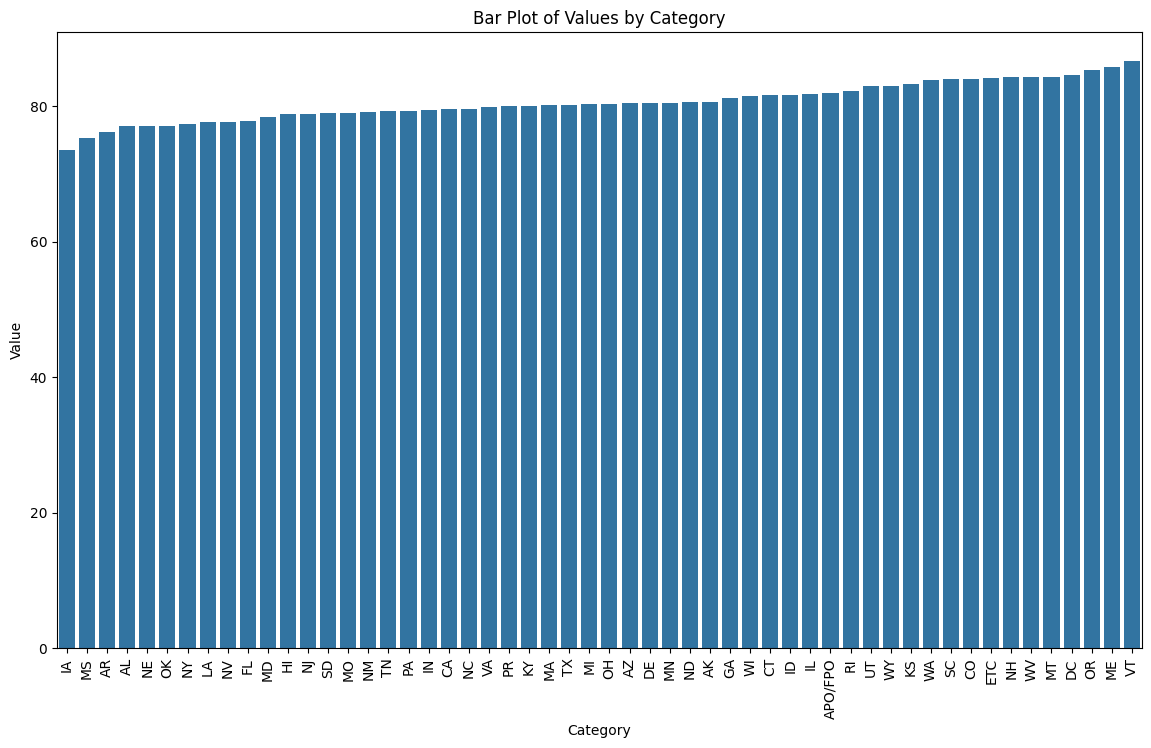

In [ ]:
import seaborn as sns
# Data
data = {
    'category_var':  state_rank.index,
    'value': state_rank.values
}

# Convert to DataFrame
df3 = pd.DataFrame(data)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='category_var', y='value', data=df3)
plt.title('Bar Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.show()

In [ ]:
#위 그래프 보고 값 조정
def convert_to_number(value):
    if value in state_N1[0:5]:
      return 0
    elif value in state_N1[5:16]:
      return 1
    elif value in state_N1[16:43]:
      return 2
    else:
      return 3

In [ ]:
df['new_state'] = df['state'].apply(convert_to_number)

In [ ]:
df[["state","new_state"]]

,state,new_state
38790,NC,2
38791,TX,2
38792,MI,2
38793,TX,2
38794,NC,2
...,...,...
1458838,CA,2
1458839,PA,2
1458840,VA,2
1458841,NY,1
